This is a companion notebook for the book [Deep Learning with Python, Third Edition](https://www.manning.com/books/deep-learning-with-python-third-edition). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

The book's contents are available online at [deeplearningwithpython.io](https://deeplearningwithpython.io).

In [ ]:
!pip install keras keras-hub --upgrade -q

In [ ]:
import os
os.environ["KERAS_BACKEND"] = "jax"

In [ ]:
# @title
import os
from IPython.core.magic import register_cell_magic

@register_cell_magic
def backend(line, cell):
    current, required = os.environ.get("KERAS_BACKEND", ""), line.split()[-1]
    if current == required:
        get_ipython().run_cell(cell)
    else:
        print(
            f"This cell requires the {required} backend. To run it, change KERAS_BACKEND to "
            f"\"{required}\" at the top of the notebook, restart the runtime, and rerun the notebook."
        )

## Introduction to TensorFlow, PyTorch, JAX, and Keras

이 장에서는 다음 내용을 다룹니다.

* 주요 딥러닝 프레임워크와 그 관계에 대한 자세한 분석
* 핵심 딥러닝 개념이 모든 프레임워크에서 코드로 어떻게 구현되는지에 대한

이 장에서는 딥러닝을 실제로 시작하는 데 필요한 모든 것을 제공합니다. 먼저 Keras와 함께 사용할 수 있는 세 가지 인기 있는 딥러닝 프레임워크를 살펴보겠습니다.

* TensorFlow (https://tensorflow.org)
* PyTorch (https://pytorch.org/)
* JAX (https://jax.readthedocs.io/)

그 다음, 2장에서 Keras를 처음 접한 내용을 바탕으로 신경망의 핵심 구성 요소와 이러한 구성 요소가 Keras API로 어떻게 변환되는지 복습합니다.

이 장을 마치면 4장에서 시작되는 실제 응용 프로그램으로 넘어갈 준비가 될 것입니다. 개요 개요

### A brief history of deep learning frameworks

실제 개발 환경에서는 2장 마지막 부분에서처럼 처음부터 저수준 코드를 직접 작성하는 경우는 드뭅니다. 대신 프레임워크를 사용하게 되죠. 현재 주요 딥러닝 프레임워크로는 Keras 외에도 JAX, TensorFlow, PyTorch가 있습니다. 이 책에서는 이 네 가지 프레임워크 모두에 대해 자세히 다룹니다.

딥러닝을 처음 접하는 사람들에게는 이 프레임워크들이 마치 오랫동안 존재해 온 것처럼 느껴질 수도 있습니다. 하지만 실제로는 모두 비교적 최근에 등장했으며, 그중 Keras가 가장 오래된 프레임워크입니다(2015년 3월 출시). 하지만 이러한 프레임워크의 기반이 되는 아이디어는 오랜 역사를 가지고 있습니다. 자동 미분에 관한 최초의 논문은 1964년에 발표되었습니다.[1]

이러한 프레임워크들은 모두 세 가지 핵심 기능을 결합합니다.

임의의 미분 가능한 함수에 대한 기울기를 계산하는 방법(자동 미분)
CPU와 GPU(그리고 다른 특수 딥러닝 하드웨어)에서 텐서 계산을 실행하는 방법
여러 장치 또는 여러 컴퓨터에 걸쳐 계산을 분산하는 방법(예: 한 컴퓨터의 여러 GPU 또는 여러 대의 컴퓨터에 분산된 여러 GPU)
이 세 가지 간단한 기능이 현대 딥러닝의 핵심입니다.

이 세 가지 문제를 모두 해결하고 재사용 가능한 형태로 패키징하는 데에는 오랜 시간이 걸렸습니다. 1960년대 초창기부터 2000년대까지 자동 미분은 머신러닝에서 실질적인 응용 분야가 없었습니다. 신경망을 다루는 사람들은 C++와 같은 언어로 직접 기울기 논리를 작성해야 했습니다. 한편, GPU 프로그래밍은 거의 불가능했습니다.

2000년대 후반부터 상황이 서서히 바뀌기 시작했습니다. 첫째, 파이썬과 그 생태계가 과학계에서 MATLAB과 C++를 제치고 점차 인기를 얻기 시작했습니다. 둘째, NVIDIA가 2006년에 CUDA를 출시하면서 일반 소비자용 GPU에서 실행되는 신경망 구축의 가능성이 열렸습니다. 초기에는 CUDA가 머신러닝보다는 물리 시뮬레이션에 집중되었지만, 2009년부터 머신러닝 연구자들이 CUDA 기반 신경망을 구현하기 시작했습니다. 당시에는 자동 미분 기능 없이 단일 GPU에서만 실행되는 일회성 구현 방식이었습니다.

자동 미분과 GPU 연산을 활용하여 딥러닝 모델을 학습시킬 수 있는 최초의 프레임워크는 2009년경에 출시된 Theano였습니다. Theano는 모든 현대 딥러닝 도구의 개념적 선조라고 할 수 있습니다. ImageNet 2012 대회 결과가 딥러닝에 대한 전 세계적인 관심을 불러일으킨 후, 2013년에서 2014년 사이에 머신러닝 연구 커뮤니티에서 본격적으로 주목받기 시작했습니다. 거의 같은 시기에, GPU를 지원하는 몇몇 딥러닝 라이브러리들이 컴퓨터 비전 분야에서 인기를 얻기 시작했는데, 특히 Torch 7(Lua 기반)과 Caffe(C++ 기반)가 주목받았습니다. Keras는 2015년 초 Theano 기반의 사용하기 쉽고 수준 높은 딥러닝 라이브러리로 출시되었고, 당시 딥러닝에 관심을 갖고 있던 수천 명의 사용자들 사이에서 빠르게 인기를 얻었습니다.

그리고 2015년 말, Google은 Theano의 핵심 아이디어들을 계승하면서 대규모 분산 컴퓨팅을 지원하는 TensorFlow를 출시했습니다. TensorFlow의 출시는 딥러닝이 주류 개발자들의 관심사로 급부상하는 계기가 된 중요한 전환점이었습니다. Keras는 곧바로 TensorFlow 지원을 추가했고, 2016년 중반에는 전체 TensorFlow 사용자 중 절반 이상이 Keras를 통해 TensorFlow를 사용하게 되었습니다.

TensorFlow에 대응하여 Meta(당시 Facebook)는 약 1년 후 PyTorch를 출시했습니다. PyTorch는 Chainer(2015년 중반에 출시되었지만 현재는 서비스가 종료된 틈새시장용 혁신적인 프레임워크)와 Maclaurin 등이 2014년에 발표한 NumPy용 CPU 전용 자동미분 라이브러리인 NumPy-Autograd에서 아이디어를 얻었습니다. 한편, Google은 GPU의 대안으로 TPU를 출시하고, TensorFlow를 TPU에서 실행할 수 있도록 개발된 고성능 컴파일러인 XLA를 함께 선보였습니다.

몇 년 후, NumPy-Autograd 개발자 중 한 명인 Matthew Johnson은 Google에서 XLA를 이용한 자동미분 대안으로 JAX를 출시했습니다. JAX는 간결한 API와 뛰어난 확장성 덕분에 연구자들 사이에서 빠르게 인기를 얻었습니다. 오늘날 Keras, TensorFlow, PyTorch, 그리고 JAX는 딥러닝 분야에서 가장 널리 사용되는 프레임워크입니다.

이처럼 혼란스러웠던 역사를 되돌아보며, 우리는 "다음은 무엇일까?"라는 질문을 던질 수 있습니다. 내일 새로운 프레임워크가 등장할까요? 새로운 프로그래밍 언어나 새로운 하드웨어 플랫폼으로 갈아탈까요?
실제 개발 환경에서는 2장 마지막 부분에서처럼 처음부터 저수준 코드를 직접 작성하는 경우는 드뭅니다. 대신 프레임워크를 사용하게 되죠. 현재 주요 딥러닝 프레임워크로는 Keras 외에도 JAX, TensorFlow, PyTorch가 있습니다. 이 책에서는 이 네 가지 프레임워크 모두에 대해 자세히 다룹니다.

딥러닝을 처음 접하는 사람들에게는 이 프레임워크들이 마치 오랫동안 존재해 온 것처럼 느껴질 수도 있습니다. 하지만 실제로는 모두 비교적 최근에 등장했으며, 그중 Keras가 가장 오래된 프레임워크입니다(2015년 3월 출시). 하지만 이러한 프레임워크의 기반이 되는 아이디어는 오랜 역사를 가지고 있습니다. 자동 미분에 관한 최초의 논문은 1964년에 발표되었습니다.[1]

이러한 프레임워크들은 모두 세 가지 핵심 기능을 결합합니다.

* 임의의 미분 가능한 함수에 대한 기울기를 계산하는 방법(자동 미분)
* CPU와 GPU(그리고 다른 특수 딥러닝 하드웨어)에서 텐서 계산을 실행하는 방법
* 여러 장치 또는 여러 컴퓨터에 걸쳐 계산을 분산하는 방법(예: 한 컴퓨터의 여러 GPU 또는 여러 대의 컴퓨터에 분산된 여러 GPU)

이 세 가지 간단한 기능이 현대 딥러닝의 핵심입니다.

이 세 가지 문제를 모두 해결하고 재사용 가능한 형태로 패키징하는 데에는 오랜 시간이 걸렸습니다. 1960년대 초창기부터 2000년대까지 자동 미분은 머신러닝에서 실질적인 응용 분야가 없었습니다. 신경망을 다루는 사람들은 C++와 같은 언어로 직접 기울기 논리를 작성해야 했습니다. 한편, GPU 프로그래밍은 거의 불가능했습니다.

2000년대 후반부터 상황이 서서히 바뀌기 시작했습니다. 첫째, 파이썬과 그 생태계가 과학계에서 MATLAB과 C++를 제치고 점차 인기를 얻기 시작했습니다. 둘째, NVIDIA가 2006년에 CUDA를 출시하면서 일반 소비자용 GPU에서 실행되는 신경망 구축의 가능성이 열렸습니다. 초기에는 CUDA가 머신러닝보다는 물리 시뮬레이션에 집중되었지만, 2009년부터 머신러닝 연구자들이 CUDA 기반 신경망을 구현하기 시작했습니다. 당시에는 자동 미분 기능 없이 단일 GPU에서만 실행되는 일회성 구현 방식이었습니다.

자동 미분과 GPU 연산을 활용하여 딥러닝 모델을 학습시킬 수 있는 최초의 프레임워크는 2009년경에 출시된 Theano였습니다. Theano는 모든 현대 딥러닝 도구의 개념적 선조라고 할 수 있습니다. ImageNet 2012 대회 결과가 딥러닝에 대한 전 세계적인 관심을 불러일으킨 후, 2013년에서 2014년 사이에 머신러닝 연구 커뮤니티에서 본격적으로 주목받기 시작했습니다. 거의 같은 시기에, GPU를 지원하는 몇몇 딥러닝 라이브러리들이 컴퓨터 비전 분야에서 인기를 얻기 시작했는데, 특히 Torch 7(Lua 기반)과 Caffe(C++ 기반)가 주목받았습니다. Keras는 2015년 초 Theano 기반의 사용하기 쉽고 수준 높은 딥러닝 라이브러리로 출시되었고, 당시 딥러닝에 관심을 갖고 있던 수천 명의 사용자들 사이에서 빠르게 인기를 얻었습니다.

그리고 2015년 말, Google은 Theano의 핵심 아이디어들을 계승하면서 대규모 분산 컴퓨팅을 지원하는 TensorFlow를 출시했습니다. TensorFlow의 출시는 딥러닝이 주류 개발자들의 관심사로 급부상하는 계기가 된 중요한 전환점이었습니다. Keras는 곧바로 TensorFlow 지원을 추가했고, 2016년 중반에는 전체 TensorFlow 사용자 중 절반 이상이 Keras를 통해 TensorFlow를 사용하게 되었습니다.

TensorFlow에 대응하여 Meta(당시 Facebook)는 약 1년 후 PyTorch를 출시했습니다. PyTorch는 Chainer(2015년 중반에 출시되었지만 현재는 서비스가 종료된 틈새시장용 혁신적인 프레임워크)와 Maclaurin 등이 2014년에 발표한 NumPy용 CPU 전용 자동미분 라이브러리인 NumPy-Autograd에서 아이디어를 얻었습니다. 한편, Google은 GPU의 대안으로 TPU를 출시하고, TensorFlow를 TPU에서 실행할 수 있도록 개발된 고성능 컴파일러인 XLA를 함께 선보였습니다.

몇 년 후, NumPy-Autograd 개발자 중 한 명인 Matthew Johnson은 Google에서 XLA를 이용한 자동미분 대안으로 JAX를 출시했습니다. JAX는 간결한 API와 뛰어난 확장성 덕분에 연구자들 사이에서 빠르게 인기를 얻었습니다. 오늘날 Keras, TensorFlow, PyTorch, 그리고 JAX는 딥러닝 분야에서 가장 널리 사용되는 프레임워크입니다.

이 혼란스러운 역사를 되돌아보며 우리는 다음과 같은 질문을 던질 수 있습니다. "다음은 무엇일까?" 내일 새로운 프레임워크가 등장할까요? 새로운 프로그래밍 언어나 하드웨어 플랫폼으로 갈아탈까요?

제 생각에는 오늘날 세 가지는 확실합니다.

* 첫째, 파이썬이 승리했습니다. 파이썬의 머신러닝 및 데이터 과학 생태계는 현재 너무나 강력한 추진력을 가지고 있습니다. 적어도 향후 15년 동안은 파이썬을 대체할 완전히 새로운 언어가 등장하지 않을 것입니다.
* 둘째, 우리는 다양한 프레임워크가 공존하는 세상에 살고 있습니다. 네 가지 주요 프레임워크는 모두 확고하게 자리 잡았으며 향후 몇 년 동안은 큰 변화 없이 유지될 것으로 예상됩니다. 따라서 각 프레임워크에 대해 조금씩이라도 알아두는 것이 좋습니다. 하지만 앞으로 기존 프레임워크 외에도 새로운 프레임워크가 인기를 얻을 가능성도 매우 높습니다. 최근 애플이 출시한 MLX가 그 예입니다. 이러한 맥락에서 Keras를 사용하는 것은 상당한 이점입니다. 새로운 Keras 백엔드를 통해 기존 Keras 모델을 새롭게 등장하는 프레임워크에서도 실행할 수 있기 때문입니다. 케라스는 2015년부터 그래왔듯이 앞으로도 머신러닝 개발자들에게 미래에도 변함없는 안정성을 제공할 것입니다. 당시에는 텐서플로우, 파이토치, JAX 같은 것은 존재하지도 않았습니다.
* 물론 미래에는 NVIDIA의 GPU나 구글의 TPU처럼 새로운 칩들이 등장할 수도 있습니다. 예를 들어 AMD의 GPU 제품군은 앞으로 밝은 미래를 기대할 수 있을 것입니다. 하지만 이러한 새로운 칩이 시장에서 자리를 잡으려면 기존 프레임워크와의 호환성이 필수적입니다. 새로운 하드웨어가 기존 워크플로우를 완전히 뒤바꿀 가능성은 낮습니다.
제 생각에는 오늘날 세 가지는 확실합니다.

* 첫째, 파이썬이 승리했습니다. 파이썬의 머신러닝 및 데이터 과학 생태계는 현재 너무나 강력한 추진력을 가지고 있습니다. 적어도 향후 15년 동안은 파이썬을 대체할 완전히 새로운 언어가 등장하지 않을 것입니다.
* 둘째, 우리는 다중 프레임워크 시대에 살고 있습니다. 네 가지 프레임워크 모두 확고하게 자리 잡았으며 향후 몇 년 동안은 크게 변하지 않을 것입니다. 각 프레임워크에 대해 조금씩이라도 배우는 것이 좋습니다. 하지만 앞으로 기존 프레임워크 외에도 새로운 프레임워크가 인기를 얻을 가능성도 매우 높습니다. 최근 애플이 출시한 MLX가 그러한 예가 될 수 있습니다. 이러한 맥락에서 Keras를 사용하는 것은 단점이 될 수 있습니다.

### How these frameworks relate to each other

Keras, TensorFlow, PyTorch, 그리고 JAX는 모두 동일한 기능을 제공하지 않으며 서로 대체할 수 없습니다. 일부 기능은 겹치지만, 대부분은 서로 다른 사용 사례에 맞춰 다른 역할을 수행합니다. 가장 큰 차이점은 Keras와 나머지 세 프레임워크 사이에 있습니다. **Keras**는 **고수준 프레임워크**인 반면, **나머지 세 프레임워크**는 **저수준 프레임워크**입니다. 집을 짓는다고 상상해 보세요. Keras는 조립식 건축 키트와 같습니다. 신경망을 설정하고 학습시키는 데 필요한 간소화된 인터페이스를 제공합니다. 반대로 TensorFlow, PyTorch, 그리고 JAX는 건축에 사용되는 원자재와 같습니다.

이전 장에서 살펴본 것처럼, 신경망 학습은 다음과 같은 개념들을 중심으로 이루어집니다.

* 첫째, 저수준 텐서 조작 - 모든 현대 머신러닝의 기반이 되는 인프라입니다. 이는 TensorFlow, PyTorch[2] 및 JAX에서 찾을 수 있는 저수준 API로 변환됩니다.
  - 텐서(네트워크 상태(변수)를 저장하는 특수 텐서 포함)
  - 덧셈, ReLU 또는 Matmul과 같은 텐서 연산
  - 수학적 표현식의 기울기를 계산하는 방법인 역전파
* 둘째, 고수준 딥러닝 개념 - 이는 Keras API로 변환됩니다.
  - 모델을 구성하는 레이어
  - 학습에 사용되는 피드백 신호를 정의하는 손실 함수
  - 학습 진행 방식을 결정하는 옵티마이저
  - 정확도와 같은 모델 성능 평가 지표
  - 미니 배치 확률적 경사 하강법을 수행하는 학습 루프

또한 Keras는 완전히 독립형 프레임워크가 아니라는 점에서 독특합니다. 조립식 주택 건축 키트가 어딘가에서 건축 자재를 조달해야 하는 것처럼 실행하려면 백엔드 엔진이 필요합니다(그림 3.4 참조). TensorFlow, PyTorch, 그리고 JAX는 모두 Keras의 백엔드로 사용할 수 있습니다. 또한 Keras는 NumPy에서도 실행될 수 있지만, NumPy는 그래디언트 API를 제공하지 않기 때문에 NumPy 기반 Keras 워크플로는 모델 예측에만 국한되며 학습은 불가능합니다.

이제 이러한 프레임워크들이 어떻게 탄생했고 서로 어떤 관계를 가지는지 더 명확하게 이해했으니, 실제로 어떻게 사용하는지 살펴보겠습니다. TensorFlow, PyTorch, 그리고 JAX 순으로 차례대로 다루겠습니다.

### Introduction to TensorFlow

TensorFlow는 주로 Google에서 개발한 Python 기반 오픈 소스 머신 러닝 프레임워크입니다. 2015년 11월에 처음 출시되었고, 2017년 2월에 v1, 2019년 10월에 v2가 출시되었습니다. TensorFlow는 업계 전반의 상용 머신 러닝 애플리케이션에 널리 사용되고 있습니다.

TensorFlow는 단순히 하나의 라이브러리가 아니라, Google에서 개발한 구성 요소와 타사에서 개발한 구성 요소를 포함하는 광범위한 생태계를 아우르는 플랫폼이라는 점을 기억해야 합니다. 예를 들어, 업계 수준의 머신 러닝 워크플로우 관리를 위한 TFX, 상용 배포를 위한 TF-Serving, 모델 양자화 및 가지치기를 위한 TF Optimization Toolkit, 그리고 모바일 애플리케이션 배포를 위한 TFLite와 MediaPipe 등이 있습니다.

이러한 구성 요소들은 최첨단 연구부터 대규모 상용 애플리케이션에 이르기까지 매우 광범위한 사용 사례를 지원합니다.

#### First steps with TensorFlow

다음 단락에서는 TensorFlow의 기본 사항들을 모두 살펴보겠습니다. 다음과 같은 핵심 개념들을 다룰 예정입니다.

* 텐서와 변수
* TensorFlow에서의 수치 연산
* GradientTape를 이용한 기울기 계산
* JIT(Just-In-Time) 컴파일을 활용한 TensorFlow 함수의 속도 향상

마지막으로, 순수 TensorFlow로 구현한 선형 회귀 분석 예제를 통해 소개를 마무리하겠습니다.

이제 텐서를 활용해 볼까요?

##### Tensors and variables in TensorFlow

TensorFlow에서 어떤 작업을 수행하려면 텐서가 필요합니다. 텐서를 생성하는 방법에는 몇 가지가 있습니다.

**상수 텐서(constant tensor)**

텐서는 초기값을 가지고 생성되어야 하므로, 일반적으로 `tf.ones`(np.ones와 동일)와 `tf.zeros`(np.zeros와 동일)를 사용하여 텐서를 생성합니다. 또한 `tf.constant`를 사용하여 Python 또는 NumPy 값으로 텐서를 생성할 수도 있습니다.있습니다.

In [158]:
import tensorflow as tf
# Equivalent to np.ones(shape=(2, 1))
tf.ones(shape=(2, 1))

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.],
       [1.]], dtype=float32)>

In [159]:
# Equivalent to np.zeros(shape=(2, 1))
tf.zeros(shape=(2, 1))

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.],
       [0.]], dtype=float32)>

In [160]:
# Equivalent to np.array([1, 2, 3], dtype="float32")
tf.constant([1, 2, 3], dtype="float32")

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

**Random tensors**

tf.random 서브모듈(np.random 서브모듈과 동일)의 메서드 중 하나를 사용하여 무작위 값으로 채워진 텐서를 생성할 수도 있습니다.

In [162]:
# Tensor of random values drawn from a normal distribution with
# mean 0 and standard deviation 1. Equivalent to
# np.random.normal(size=(3, 1), loc=0., scale=1.).
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[1.2768353]
 [0.2080738]
 [1.7739302]], shape=(3, 1), dtype=float32)


In [163]:
# Tensor of random values drawn from a uniform distribution between
# 0 and 1. Equivalent to np.random.uniform(size=(3, 1), low=0.,
# high=1.)
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.93713295]
 [0.15244794]
 [0.44657898]], shape=(3, 1), dtype=float32)


**Tensor assignment and the Variable class**

NumPy 배열과 TensorFlow 텐서의 중요한 차이점은 TensorFlow 텐서는 값을 할당할 수 없다는 것입니다. 즉, 상수입니다. 예를 들어 NumPy에서는 다음과 같이 할 수 있습니다.

In [165]:
import numpy as np

x = np.ones(shape=(2, 2))
x[0, 0] = 0.0

TensorFlow에서 똑같은 작업을 시도해 보세요. 그러면 "EagerTensor 객체는 항목 할당을 지원하지 않습니다."라는 오류가 발생할 것입니다.
```
x = tf.ones(shape=(2, 2))
# This will fail, as a tensor isn't assignable.
x[0, 0] = 0
```

모델을 학습시키려면 텐서 집합인 모델의 상태를 업데이트해야 합니다. 텐서는 값을 직접 할당할 수 없다면 어떻게 해야 할까요? 바로 변수가 필요한 이유입니다. `tf.Variable` 클래스는 TensorFlow에서 수정 가능한 상태를 관리하기 위한 클래스입니다.

변수를 생성하려면 임의의 텐서와 같은 초기값을 제공해야 합니다..0

In [167]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.43199942],
       [ 0.00481489],
       [-0.06917159]], dtype=float32)>


변수의 상태는 assign 메서드를 통해 수정할 수 있습니다.

In [169]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [170]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

마찬가지로 assign_add와 assign_sub는 +=와 -=의 효율적인 대체 함수입니다.

In [172]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

##### Tensor operations: Doing math in TensorFlow

NumPy와 마찬가지로 TensorFlow는 수학 공식을 표현하기 위한 다양한 텐서 연산을 제공합니다. 다음은 몇 가지 예입니다.

In [174]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
f = tf.concat((a, b), axis=0)

다음은 2장에서 살펴본 Dense 층에 해당하는 것입니다.

In [176]:
def dense(inputs, W, b):
    return tf.nn.relu(tf.matmul(inputs, W) + b)

##### Gradients in TensorFlow: A second look at the GradientTape API

지금까지는 TensorFlow가 NumPy와 매우 유사해 보입니다. 하지만 NumPy가 할 수 없는 한 가지가 있습니다. 바로 미분 가능한 표현식의 입력값에 대한 기울기를 구하는 것입니다. GradientTape 스코프를 열고 하나 또는 여러 개의 입력 텐서에 연산을 적용한 다음, 결과값에 대한 입력값의 기울기를 구하면 됩니다.

In [178]:
input_var = tf.Variable(initial_value=3.0)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

이 함수는 일반적으로 모델의 손실 함수에 대한 가중치의 기울기를 구하는 데 사용됩니다. 예를 들어, `gradients = tape.gradient(loss, weights)`와 같이 사용할 수 있습니다.

2장에서는 GradientTape가 단일 입력 또는 입력 리스트에서 어떻게 작동하는지, 그리고 입력이 스칼라 또는 고차원 텐서일 수 있다는 것을 살펴보았습니다.

지금까지는 `tape.gradient()`의 입력 텐서가 TensorFlow 변수인 경우만 살펴보았습니다. 하지만 실제로는 임의의 텐서가 입력으로 사용될 수 있습니다. 다만, 기본적으로는 학습 가능한 변수만 추적됩니다. 상수 텐서를 추적하려면 `tape.watch()`를 호출하여 수동으로 추적 대상으로 지정해야 합니다.

In [180]:
input_const = tf.constant(3.0)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

왜냐하면 어떤 변수에 대한 어떤 값의 기울기를 계산하는 데 필요한 정보를 미리 저장하는 것은 너무 비용이 많이 들기 때문입니다. 자원 낭비를 막기 위해 기울기 테이프는 무엇을 감시해야 하는지 알아야 합니다. 학습 가능한 변수들이 기본적으로 감시 대상이 되는데, 이는 학습 가능한 변수 목록에 대한 손실 함수의 기울기를 계산하는 것이 기울기 테이프의 가장 일반적인 사용 사례이기 때문입니다.

기울기 테이프는 강력한 유틸리티로, 2차 기울기, 즉 기울기의 기울기까지 계산할 수 있습니다. 예를 들어, 시간에 대한 물체의 위치의 기울기는 물체의 속도이고, 2차 기울기는 가속도입니다.

떨어지는 사과의 위치를 ​​수직축을 따라 시간에 따라 측정했을 때 위치(시간) = 4.9 * 시간 ** 2라는 식이 성립한다면, 사과의 가속도는 얼마일까요? 두 개의 중첩된 기울기 테이프를 사용하여 이를 구해 보겠습니다.

In [182]:
time = tf.Variable(0.0)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time**2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

##### Making TensorFlow functions fast using compilation

지금까지 작성한 모든 TensorFlow 코드는 "즉시 실행(eager execution)" 방식으로 실행되었습니다. 즉, 파이썬 런타임에서 파이썬 코드나 NumPy 코드처럼 연산이 순차적으로 실행됩니다. 즉시 실행 방식은 디버깅에는 유용하지만 일반적으로 속도가 매우 느립니다. 따라서 일부 연산을 병렬화하거나, 연속적인 두 연산(예: matmul 다음에 relu 함수를 실행하는 경우)을 중간 출력을 생성하지 않고 동일한 작업을 수행하는 단일의 효율적인 연산으로 대체하는 "연산 융합(fuse)"이 유용할 수 있습니다.

이는 컴파일을 통해 구현할 수 있습니다. 컴파일의 기본 개념은 파이썬으로 작성한 특정 함수를 파이썬 코드에서 추출하여 더 빠르고 효율적인 "컴파일된 프로그램"으로 자동 재작성한 다음, 파이썬 런타임에서 해당 프로그램을 호출하는 것입니다.

컴파일의 주요 이점은 성능 향상입니다. 하지만 단점도 있습니다. 작성한 코드가 더 이상 실행되는 코드가 아니기 때문에 디버깅이 어려워질 수 있습니다. 따라서 파이썬 런타임에서 코드를 충분히 디버깅한 후에 컴파일 기능을 활성화하는 것이 좋습니다.

다음과 같이 `tf.function` 데코레이터로 함수를 감싸면 모든 TensorFlow 함수에 컴파일 기능을 적용할 수 있습니다.

In [184]:
@tf.function
def dense(inputs, W, b):
    return tf.nn.relu(tf.matmul(inputs, W) + b)

이렇게 하면 dense() 호출은 더 최적화된 버전의 함수를 구현하는 컴파일된 프로그램 호출로 대체됩니다. 처음 함수를 호출할 때는 TensorFlow가 코드를 컴파일하기 때문에 시간이 조금 더 걸립니다. 하지만 이는 한 번만 발생하며, 이후 동일한 함수를 호출할 때는 빠르게 실행됩니다.

TensorFlow에는 두 가지 컴파일 모드가 있습니다.

첫 번째는 기본 모드인 "그래프 모드"입니다. @tf.function으로 장식된 모든 함수는 그래프 모드에서 실행됩니다.

두 번째는 고성능 머신러닝 컴파일러인 XLA(Accelerated Linear Algebra)를 사용한 컴파일입니다. 다음과 같이 jit_compile=True를 지정하여 XLA 컴파일을 활성화할 수 있습니다.

In [186]:
@tf.function(jit_compile=True)
def dense(inputs, W, b):
    return tf.nn.relu(tf.matmul(inputs, W) + b)

함수를 XLA로 컴파일하면 그래프 모드보다 실행 속도가 더 빨라지는 경우가 종종 있습니다. 다만 컴파일러가 처리해야 할 작업이 더 많기 때문에 처음 실행할 때는 시간이 더 오래 걸립니다.

#### An end-to-end example: A linear classifier in pure TensorFlow

텐서, 변수, 텐서 연산에 대해 알고 있고, 그래디언트를 계산하는 방법도 알고 있습니다. 이 정도면 경사 하강법을 기반으로 하는 모든 TensorFlow 기반 머신러닝 모델을 구축하기에 충분합니다. 모든 것이 명확해지도록 처음부터 끝까지 예제를 통해 살펴보겠습니다.

머신러닝 관련 면접에서 선형 분류기를 처음부터 구현해 보라는 질문을 받을 수 있습니다. 이는 머신러닝에 대한 기본적인 지식이 있는 지원자와 그렇지 않은 지원자를 구분하는 간단한 과제입니다. 이제 이 과제를 통과하고, TensorFlow에 대한 새로운 지식을 활용하여 선형 분류기를 구현해 보겠습니다.

먼저, 선형적으로 분리하기 쉬운 합성 데이터를 만들어 보겠습니다. 2차원 평면상의 두 클래스로 나뉜 점들입니다.

In [189]:
import numpy as np

num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    # Generates the first class of points: 1,000 random 2D points with
    # specified "mean" and "covariance matrix." Intuitively, the
    # "covariance matrix" describes the shape of the point cloud, and
    # the "mean" describes its position in the plane. `cov=[[1,
    # 0.5],[0.5, 1]]` corresponds to "an oval-like point cloud oriented
    # from bottom left to top right."
    mean=[0, 3], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    # Generates the other class of points with a different mean and the
    # same covariance matrix (point cloud with a different position and
    # the same shape)
    mean=[3, 0], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class
)

negative_samples와 positive_samples는 모두 (1000, 2) 형태의 배열입니다. 이들을 (2000, 2) 형태의 단일 배열로 합쳐 보겠습니다.

In [191]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

이제 해당 대상 레이블을 생성해 보겠습니다. 대상 레이블은 (2000, 1) 형태의 0과 1로 이루어진 배열이며, targets[i, 0]은 inputs[i]가 클래스 0에 속하면 0이고 그 반대의 경우도 마찬가지입니다.

In [193]:
targets = np.vstack(
    (
        np.zeros((num_samples_per_class, 1), dtype="float32"),
        np.ones((num_samples_per_class, 1), dtype="float32"),
    )
)

그림 3.1에서 보는 것처럼, 잘 알려진 파이썬 데이터 시각화 라이브러리인 Matplotlib을 사용하여 데이터를 그래프로 나타내 보겠습니다. (Matplotlib은 Colab에 기본적으로 설치되어 있으므로 따로 설치할 필요가 없습니다.)

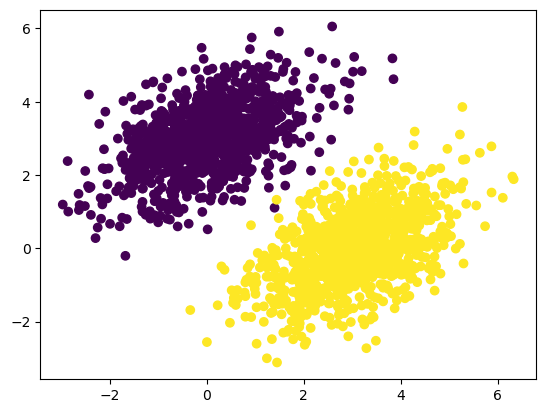

In [195]:
import matplotlib.pyplot as plt

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

이제 이 두 덩어리를 구분할 수 있도록 선형 분류기를 만들어 보겠습니다. 선형 분류기는 예측값과 목표값의 차이의 제곱을 최소화하도록 학습된 아핀 변환(예측값 = matmul(입력값, W) + b)입니다.

보시다시피, 이 예제는 2장 마지막 부분에 나왔던 간단한 2층 신경망 예제보다 훨씬 간단합니다. 하지만 이번에는 코드의 모든 내용을 한 줄 한 줄 이해할 수 있을 것입니다.

먼저 변수 W와 b를 생성하고, 각각 임의의 값과 0으로 초기화합니다.

In [197]:
# The inputs will be 2D points.
input_dim = 2
# The output predictions will be a single score per sample (close to 0
# if the sample is predicted to be in class 0, and close to 1 if the
# sample is predicted to be in class 1).
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

다음은 순방향 전달 함수입니다.

In [199]:
def model(inputs, W, b):
    return tf.matmul(inputs, W) + b

우리의 선형 분류기는 2차원 입력값을 사용하므로, W는 실제로 두 개의 스칼라 계수, 즉 W = [[w1], [w2]]로 표현됩니다. 한편, b는 하나의 스칼라 계수입니다. 따라서 주어진 입력값 [x, y]에 대한 예측값은 prediction = [[w1], [w2]] • [x, y] + b = w1 * x + w2 * y + b가 됩니다.

손실 함수는 다음과 같습니다.

In [201]:
def mean_squared_error(targets, predictions):
    # per_sample_losses will be a tensor with the same shape as targets
    # and predictions, containing per-sample loss scores.
    per_sample_losses = tf.square(targets - predictions)
    # We need to average these per-sample loss scores into a single
    # scalar loss value: reduce_mean does this.
    return tf.reduce_mean(per_sample_losses)

이제 학습 단계로 넘어가는데, 이 단계에서는 학습 데이터를 입력받아 데이터에 대한 손실을 최소화하도록 가중치 W와 b를 업데이트합니다.

In [203]:
learning_rate = 0.1

# Wraps the function in a tf.function decorator to speed it up
@tf.function(jit_compile=True)
def training_step(inputs, targets, W, b):
    # Forward pass, inside of a gradient tape scope
    with tf.GradientTape() as tape:
        predictions = model(inputs, W, b)
        loss = mean_squared_error(predictions, targets)
    # Retrieves the gradient of the loss with regard to weights
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    # Updates the weights
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

간단하게 설명하기 위해 미니 배치 학습 대신 배치 학습을 사용하겠습니다. 즉, 작은 배치 단위로 데이터를 반복 처리하는 대신 전체 데이터에 대해 각 학습 단계(기울기 계산 및 가중치 업데이트)를 실행합니다. 이는 순방향 전달과 2,000개의 샘플에 대한 기울기 계산을 한 번에 수행해야 하므로 각 학습 단계의 실행 시간이 훨씬 길어진다는 것을 의미합니다. 하지만 각 기울기 업데이트는 전체 학습 샘플의 정보를 포함하므로 손실을 줄이는 데 훨씬 효과적입니다. 예를 들어, 128개의 무작위 샘플만 사용하는 것과는 대조적입니다. 결과적으로 학습 단계 수가 훨씬 줄어들고, 미니 배치 학습에서 일반적으로 사용하는 학습률(이전에 정의한 대로 learning_rate = 0.1)보다 더 큰 학습률을 사용할 수 있습니다.

In [205]:
for step in range(40):
    loss = training_step(inputs, targets, W, b)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 5.5143
Loss at step 1: 0.3612
Loss at step 2: 0.1539
Loss at step 3: 0.1193
Loss at step 4: 0.1079
Loss at step 5: 0.1002
Loss at step 6: 0.0935
Loss at step 7: 0.0875
Loss at step 8: 0.0820
Loss at step 9: 0.0770
Loss at step 10: 0.0724
Loss at step 11: 0.0682
Loss at step 12: 0.0644
Loss at step 13: 0.0609
Loss at step 14: 0.0578
Loss at step 15: 0.0549
Loss at step 16: 0.0522
Loss at step 17: 0.0498
Loss at step 18: 0.0476
Loss at step 19: 0.0456
Loss at step 20: 0.0438
Loss at step 21: 0.0422
Loss at step 22: 0.0406
Loss at step 23: 0.0393
Loss at step 24: 0.0380
Loss at step 25: 0.0368
Loss at step 26: 0.0358
Loss at step 27: 0.0348
Loss at step 28: 0.0340
Loss at step 29: 0.0332
Loss at step 30: 0.0324
Loss at step 31: 0.0318
Loss at step 32: 0.0312
Loss at step 33: 0.0306
Loss at step 34: 0.0301
Loss at step 35: 0.0297
Loss at step 36: 0.0292
Loss at step 37: 0.0289
Loss at step 38: 0.0285
Loss at step 39: 0.0282


40단계를 거친 후, 훈련 손실은 약 0.025에서 안정화된 것으로 보입니다. 그림 3.2에서 볼 수 있듯이, 선형 모델이 훈련 데이터 포인트를 어떻게 분류하는지 그래프로 나타내 보겠습니다. 목표값이 0과 1이므로, 주어진 입력 포인트는 예측값이 0.5 미만이면 "0"으로, 0.5 이상이면 "1"로 분류됩니다.

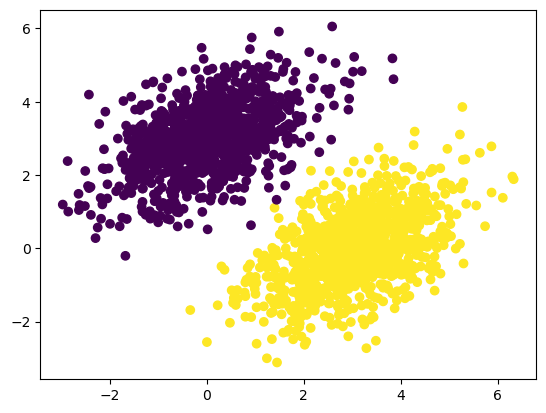

In [207]:
predictions = model(inputs, W, b)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

주어진 점 [x, y]에 대한 예측값은 간단히 예측값 == [[w1], [w2]] • [x, y] + b == w1 * x + w2 * y + b 입니다. 따라서 클래스 "0"은 w1 * x + w2 * y + b < 0.5로 정의되고, 클래스 "1"은 w1 * x + w2 * y + b > 0.5로 정의됩니다. 이것은 2차원 평면에서 직선의 방정식, 즉 w1 * x + w2 * y + b = 0.5를 나타냅니다. 클래스 1은 직선 위에 있고, 클래스 0은 직선 아래에 있습니다. 직선 방정식을 y = a * x + b 형식으로 나타내는 데 익숙하실 텐데, 같은 형식으로 나타내면 이 직선은 y = - w1 / w2 * x + (0.5 - b) / w2가 됩니다.

이제 그림 3.3과 같이 이 직선을 그래프로 나타내 보겠습니다.

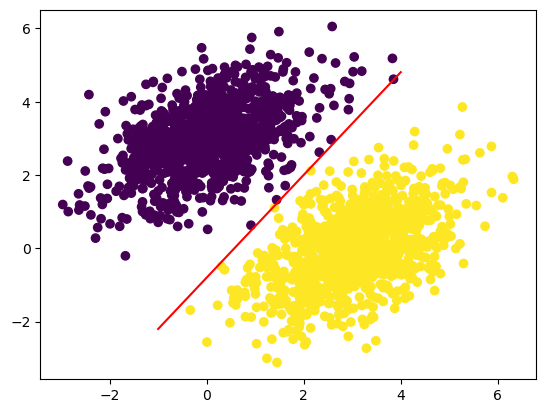

In [209]:
# Generates 100 regularly spaced numbers between -1 and 4, which we
# will use to plot our line
x = np.linspace(-1, 4, 100)
# This is our line's equation.
y = -W[0] / W[1] * x + (0.5 - b) / W[1]
# Plots our line (`"-r"` means "plot it as a red line")
plt.plot(x, y, "-r")
# Plots our model's predictions on the same plot
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

이것이 바로 선형 분류기의 핵심입니다. 두 데이터 클래스를 깔끔하게 구분하는 직선(또는 고차원 공간에서는 초평면)의 매개변수를 찾는 것입니다.

#### What makes the TensorFlow approach unique

이제 TensorFlow 기반 워크플로우의 기본 API들을 모두 익히셨고, PyTorch와 JAX 같은 다른 프레임워크들을 더 자세히 살펴보려고 합니다. TensorFlow는 다른 프레임워크와 어떤 차이점이 있을까요? 언제 TensorFlow를 사용해야 하고, 언제 다른 프레임워크를 사용할 수 있을까요?

저희 생각에는 TensorFlow의 주요 장점은 다음과 같습니다.

* 그래프 모드와 XLA 컴파일 덕분에 속도가 매우 빠릅니다. 일반적으로 PyTorch와 NumPy보다 훨씬 빠르며, JAX는 종종 더 빠르기도 합니다.

* 기능이 매우 완벽합니다. 모든 프레임워크 중에서 유일하게 문자열 텐서뿐만 아니라 "래그드 텐서"(서로 다른 항목의 차원이 다를 수 있는 텐서 - 시퀀스를 처리할 때 공통 길이로 패딩할 필요가 없어 매우 유용함)도 지원합니다. 또한 고성능의 tf.data API를 통해 데이터 전처리를 훌륭하게 지원합니다. tf.data는 JAX에서도 데이터 전처리에 권장할 정도로 뛰어납니다. TensorFlow는 어떤 작업을 하든 해결책을 제공합니다.
* 특히 모바일이나 브라우저 배포와 관련하여 모든 프레임워크 중에서 프로덕션 배포를 위한 생태계가 가장 성숙합니다.

하지만 TensorFlow에는 몇 가지 눈에 띄는 단점도 있습니다.

* 기능이 매우 완벽하다는 장점에도 불구하고 API가 방대합니다. TensorFlow에는 수천 가지의 다양한 연산이 포함되어 있습니다.
* 수치 연산 API가 NumPy API와 일관성이 없는 경우가 있어 NumPy에 이미 익숙한 사용자에게는 다소 어려울 수 있습니다.
* 인기 있는 사전 학습 모델 공유 플랫폼인 Hugging Face는 TensorFlow에 대한 지원이 부족하여 최신 생성형 AI 모델을 TensorFlow에서 항상 사용할 수 있는 것은 아닙니다.

이제 PyTorch로 넘어가 보겠습니다.h로 넘어가 보겠습니다.

### Introduction to PyTorch

PyTorch는 Meta(구 Facebook)에서 주로 개발한 Python 기반 오픈 소스 머신 러닝 프레임워크입니다. 2016년 9월 TensorFlow 출시에 대응하여 처음 공개되었으며, 2018년에 1.0 버전, 2023년에 2.0 버전이 출시되었습니다. PyTorch는 현재는 개발이 중단된 Chainer 프레임워크의 프로그래밍 스타일을 계승했으며, Chainer 자체는 NumPy-Autograd에서 영감을 받았습니다. PyTorch는 머신 러닝 연구 커뮤니티에서 널리 사용되고 있습니다.

TensorFlow와 마찬가지로 PyTorch는 torchvision, torchaudio, 인기 있는 모델 공유 플랫폼인 Hugging Face와 같은 관련 패키지들의 거대한 생태계의 중심에 있습니다.

PyTorch API는 TensorFlow 및 JAX보다 상위 수준이며, Keras처럼 레이어와 옵티마이저를 포함합니다. 이러한 레이어와 옵티마이저는 Keras를 PyTorch 백엔드와 함께 사용할 때 Keras 워크플로와 호환됩니다.

#### First steps with PyTorch

다음 단락에서는 PyTorch의 기본 사항들을 모두 살펴보겠습니다. 다음과 같은 핵심 개념들을 다룰 것입니다.

* 텐서와 파라미터
* PyTorch에서의 수치 연산
* backward() 메서드를 이용한 기울기 계산
* Module 클래스를 이용한 연산 패키징
* 컴파일을 활용한 PyTorch 속도 향상
* 마지막으로, 선형 회귀 예제를 순수 PyTorch로 다시 구현해 보겠습니다.

##### Tensors and parameters in PyTorch

PyTorch를 처음 접할 때 알아두면 좋은 점은 패키지 이름이 pytorch가 아니라 torch라는 것입니다. pip install torch 명령어로 설치하고 import torch 명령어로 불러옵니다.

NumPy나 TensorFlow처럼, 이 프레임워크의 핵심 객체는 텐서입니다. 이제 PyTorch 텐서를 직접 다뤄보겠습니다.

###### Constant tensors

In [ ]:
import torch
# Unlike in other frameworks, the shape argument is named "size"
# rather than "shape."
torch.ones(size=(2, 1))

In [ ]:
torch.zeros(size=(2, 1))

In [ ]:
# Unlike in other frameworks, you cannot pass dtype="float32" as a
# string. The dtype argument must be a torch dtype instance.
torch.tensor([1, 2, 3], dtype=torch.float32)

###### Random tensors

랜덤 텐서 생성은 NumPy 및 TensorFlow와 유사하지만 구문이 다릅니다. 예를 들어 `normal` 함수를 살펴보면, 이 함수는 `shape` 인수를 받지 않습니다. 대신 평균과 표준 편차를 예상되는 출력 형태를 가진 PyTorch 텐서로 제공해야 합니다.

In [ ]:
torch.normal(
mean=torch.zeros(size=(3, 1)),
std=torch.ones(size=(3, 1)))

랜덤 균일 텐서를 생성하려면 `torch.rand`를 사용하면 됩니다. `np.random.uniform`이나 `tf.random.uniform`과는 달리, 출력 형태는 각 차원에 대해 독립적인 인수로 제공해야 합니다. 예를 들어 다음과 같습니다.

In [ ]:
torch.rand(3, 1)

###### Tensor assignment and the Parameter class

NumPy 배열과 유사하지만 TensorFlow 텐서와는 달리 PyTorch 텐서는 할당 가능합니다. 다음과 같은 연산을 수행할 수 있습니다.

In [ ]:
x = torch.zeros(size=(2, 1))
x[0, 0] = 1.
x

모델의 학습 가능한 상태를 저장하는 데 일반 `torch.Tensor`를 사용할 수도 있지만, PyTorch는 이를 위해 특화된 텐서 서브클래스인 `torch.nn.parameter.Parameter` 클래스를 제공합니다. 일반 텐서와 비교했을 때, 이 클래스는 의미론적 명확성을 제공합니다. `Parameter`를 보면 학습 가능한 상태의 일부라는 것을 알 수 있지만, 일반 텐서는 무엇이든 될 수 있습니다. 결과적으로, PyTorch는 Keras의 `Variable` 인스턴스처럼 PyTorch 모델에 할당된 파라미터를 자동으로 추적하고 검색할 수 있습니다.

다음은 파라미터의 예입니다.

In [ ]:
x = torch.zeros(size=(2, 1))
# A Parameter can only be created using a torch.Tensor value — no
# NumPy arrays allowed.
p = torch.nn.parameter.Parameter(data=x)

##### Tensor operations: Doing math in PyTorch

PyTorch에서의 수학 연산은 NumPy나 TensorFlow에서의 수학 연산과 동일하게 작동하지만, TensorFlow와 마찬가지로 PyTorch API는 NumPy API와 미묘하게 다른 부분이 종종 있습니다.

In [ ]:
a = torch.ones((2, 2))
# Takes the square, same as np.square
b = torch.square(a)
# Takes the square root, same as np.sqrt
c = torch.sqrt(a)
# Adds two tensors (element-wise)
d = b + c
# Takes the product of two tensors (see chapter 2), same as np.matmul
e = torch.matmul(a, b)
# Concatenates a and b along axis 0, same as np.concatenate
f = torch.cat((a, b), dim=0)

In [ ]:
def dense(inputs, W, b):
    return torch.nn.relu(torch.matmul(inputs, W) + b)

##### Computing gradients with PyTorch

PyTorch에는 명시적인 "그래디언트 테이프"는 없습니다. 하지만 유사한 메커니즘이 존재합니다. PyTorch에서 연산을 실행하면 프레임워크가 일회성 연산 그래프("테이프")를 생성하여 방금 발생한 작업을 기록합니다. 그러나 이 테이프는 사용자에게 숨겨져 있습니다. 이를 사용하는 공개 API는 텐서 자체 수준에서 제공됩니다. `tensor.backward()`를 호출하면 해당 텐서를 생성하기 위해 이전에 실행된 모든 연산에 대해 역전파를 실행할 수 있습니다. 이렇게 하면 그래디언트를 추적하는 모든 텐서의 `.grad` 속성이 채워집니다.

In [ ]:
# To compute gradients with respect to a tensor, it must be created
# with requires_grad=True.
input_var = torch.tensor(3.0, requires_grad=True)
result = torch.square(input_var)
# Calling backward() populates the "grad" attribute on all tensors
# create with requires_grad=True.
result.backward()
gradient = input_var.grad
gradient

backward() 함수를 여러 번 연속으로 호출하면 .grad 속성에 기울기가 "누적"됩니다. 즉, 각 호출마다 새로운 기울기와 이전 기울기가 합산됩니다. 예를 들어, 다음 코드에서 input_var.grad는 input_var에 대한 square(input_var)의 기울기가 아니라, 해당 기울기와 이전에 계산된 기울기의 합입니다. 따라서 마지막 코드 조각 이후 값이 두 배가 되었습니다.

In [ ]:
result = torch.square(input_var)
result.backward()
# .grad will sum all gradient values from each time backward() is
# called.
input_var.grad

그라디언트를 초기화하려면 .grad를 None으로 설정하기만 하면 됩니다.

In [ ]:
input_var.grad = None

#### An end-to-end example: A linear classifier in pure PyTorch

이제 여러분은 PyTorch로 선형 분류기를 다시 작성할 수 있을 만큼 충분한 지식을 갖추었습니다. TensorFlow 버전과 매우 유사하며, 주요 차이점은 기울기를 계산하는 방식입니다.

먼저 모델 변수를 생성해 보겠습니다. 기울기를 계산할 수 있도록 `requires_grad=True`를 전달하는 것을 잊지 마세요.

In [ ]:
input_dim = 2
output_dim = 1

W = torch.rand(input_dim, output_dim, requires_grad=True)
b = torch.zeros(output_dim, requires_grad=True)

이것이 저희 모델입니다. 지금까지는 차이점이 없습니다. 단지 tf.matmul에서 torch.matmul로 변경했을 뿐입니다.

In [ ]:
def model(inputs, W, b):
    return torch.matmul(inputs, W) + b

이것이 우리의 손실 함수입니다. tf.square를 torch.square로, tf.reduce_mean을 torch.mean으로 바꾸기만 하면 됩니다.

In [ ]:
def mean_squared_error(targets, predictions):
    per_sample_losses = torch.square(targets - predictions)
    return torch.mean(per_sample_losses)

이제 학습 단계입니다. 작동 방식은 다음과 같습니다.

* loss.backward()는 손실 출력 노드에서 역전파를 실행하고 손실 계산에 사용된 모든 텐서의 tensor.grad 속성을 채웁니다. tensor.grad는 해당 텐서에 대한 손실의 기울기를 나타냅니다.

* 우리는 .grad 속성을 사용하여 W와 b에 대한 손실의 기울기를 얻습니다.

* 이러한 기울기를 사용하여 W와 b를 업데이트합니다. 이러한 업데이트는 역전파의 일부가 아니므로, 기울기 계산을 건너뛰는 torch.no_grad() 스코프 내에서 수행합니다.

* W와 b 매개변수의 .grad 속성 내용을 None으로 설정하여 초기화합니다. 이렇게 하지 않으면 training_step() 호출이 여러 번 반복되면서 기울기 값이 누적되어 잘못된 값이 생성될 수 있습니다.

In [ ]:
learning_rate = 0.1

def training_step(inputs, targets, W, b):
    predictions = model(inputs)
    loss = mean_squared_error(targets, predictions)
    loss.backward()
    grad_loss_wrt_W, grad_loss_wrt_b = W.grad, b.grad
    with torch.no_grad():
        W -= grad_loss_wrt_W * learning_rate
        b -= grad_loss_wrt_b * learning_rate
    W.grad = None
    b.grad = None
    return loss

이보다 더 간단하게 만들 수 있는 방법이 있습니다. 살펴보겠습니다.

##### Packaging state and computation with the Module class

PyTorch는 역전파를 수행하기 위한 고수준의 객체 지향 API를 제공하며, 이를 위해서는 두 가지 새로운 클래스, 즉 `torch.nn.Module` 클래스와 `torch.optim` 모듈의 옵티마이저 클래스(예: `torch.optim.SGD`, Keras의 `optimizers.SGD`와 동일)를 사용해야 합니다.

기본적인 아이디어는 `torch.nn.Module`의 서브클래스를 정의하는 것입니다. 이 서브클래스는 다음과 같은 역할을 합니다.

* 상태 변수를 저장할 매개변수를 갖습니다. 이 매개변수는 `__init__()` 메서드에서 정의됩니다.

* 순방향 전달 연산은 `forward()` 메서드에서 구현합니다.

다음과 같은 형태가 되어야 합니다.

In [ ]:
class LinearModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.W = torch.nn.Parameter(torch.rand(input_dim, output_dim))
        self.b = torch.nn.Parameter(torch.zeros(output_dim))

    def forward(self, inputs):
        return torch.matmul(inputs, self.W) + self.b

이제 LinearModel을 인스턴스화할 수 있습니다.

In [ ]:
model = LinearModel()

torch.nn.Module 인스턴스를 사용할 때 forward() 메서드를 직접 호출하는 대신 __call__()을 사용합니다(즉, 입력값에 대해 모델 클래스를 직접 호출합니다). 이렇게 하면 forward()로 리디렉션되지만 몇 가지 프레임워크 훅이 추가됩니다.

In [ ]:
torch_inputs = torch.tensor(inputs)
output = model(torch_inputs)

이제 PyTorch 옵티마이저를 직접 사용해 보겠습니다. 옵티마이저를 인스턴스화하려면 옵티마이저가 업데이트할 매개변수 목록을 제공해야 합니다. 이 목록은 Module 인스턴스의 `.parameters()`를 통해 가져올 수 있습니다.

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

모듈 인스턴스와 PyTorch SGD 옵티마이저를 사용하여 간소화된 학습 단계를 실행할 수 있습니다.

In [ ]:
def training_step(inputs, targets):
    predictions = model(inputs)
    loss = mean_squared_error(targets, predictions)
    loss.backward()
    optimizer.step()
    model.zero_grad()
    return loss

이전에는 모델 매개변수를 업데이트하는 방법이 다음과 같았습니다.
```
with torch.no_grad():
    W -= grad_loss_wrt_W * learning_rate
    b -= grad_loss_wrt_b * learning_rate
```

이제 optimizer.step()만 사용하면 됩니다.

마찬가지로, 이전에는 각 파라미터의 기울기를 수동으로 재설정하기 위해 tensor.grad = None을 사용해야 했습니다. 이제는 model.zero_grad()만 사용하면 됩니다.

전반적으로, 이 과정이 다소 복잡하게 느껴질 수 있습니다. 손실 텐서, 옵티마이저, 그리고 Module 인스턴스가 마치 숨겨진 메커니즘을 통해 서로를 인식하는 것처럼 보이기 때문입니다. 마치 멀리서 신비로운 작용을 하는 것처럼 서로 상호작용합니다. 하지만 걱정하지 마세요. 이 일련의 단계(loss.backward() - optimizer.step() - model.zero_grad())를 마치 마법 주문처럼 생각하고 필요할 때마다 훈련 단계 함수를 작성하면 됩니다. 단, model.zero_grad()를 잊지 않도록 주의하세요. 만약 잊는다면 심각한 버그가 발생할 수 있습니다(안타깝게도 꽤 흔한 버그입니다!).

##### Making PyTorch modules fast using compilation

마지막으로 한 가지 더 말씀드리겠습니다. TensorFlow에서 함수 컴파일을 통해 성능을 향상시키는 것처럼, PyTorch에서도 `torch.compile()` 유틸리티를 통해 함수 또는 모듈 인스턴스를 컴파일할 수 있습니다. 이 API는 PyTorch 자체 컴파일러인 Dynamo를 사용합니다.

이제 선형 회귀 모듈에 적용해 보겠습니다.

In [ ]:
compiled_model = torch.compile(model)

생성된 객체는 원래 객체와 동일하게 작동하도록 설계되었지만, 순방향 및 역방향 전달 속도가 더 빨라야 합니다.

또한 `torch.compile()`을 함수 데코레이터로 사용할 수도 있습니다.

In [ ]:
@torch.compile
def dense(inputs, W, b):
    return torch.nn.relu(torch.matmul(inputs, W) + b)

실제로 대부분의 PyTorch 코드는 컴파일을 사용하지 않고 즉시 실행됩니다. 컴파일러가 모든 모델에서 항상 작동하는 것은 아니며, 작동하더라도 항상 속도 향상을 가져오는 것은 아니기 때문입니다. TensorFlow나 Jax처럼 라이브러리 개발 초기부터 컴파일 기능이 내장되어 있던 것과는 달리, PyTorch의 컴파일러는 비교적 최근에 추가된 기능입니다.

#### What makes the PyTorch approach unique

다음으로 살펴볼 TensorFlow와 JAX와 비교했을 때, PyTorch의 차별점은 무엇일까요? PyTorch를 사용해야 할 이유와 사용하지 말아야 할 이유는 무엇일까요?

PyTorch의 두 가지 핵심 강점은 다음과 같습니다.

* PyTorch 코드는 기본적으로 즉시 실행되므로 디버깅이 용이합니다. TensorFlow와 JAX 코드도 마찬가지이지만, PyTorch는 일반적으로 항상 즉시 실행되도록 설계된 반면, TensorFlow나 JAX 프로젝트는 필연적으로 컴파일이 필요하며, 이는 디버깅 경험을 크게 저해할 수 있다는 큰 차이점이 있습니다.

* 인기 있는 사전 학습 모델 공유 플랫폼인 Hugging Face는 PyTorch를 완벽하게 지원합니다. 즉, 사용하고 싶은 모델은 대부분 PyTorch에서도 사용할 수 있다는 의미입니다. 이것이 오늘날 PyTorch가 널리 사용되는 주요 원동력입니다.

한편, PyTorch 사용에는 몇 가지 단점도 있습니다.

* TensorFlow와 마찬가지로 PyTorch API는 NumPy와 일관성이 없습니다. 게다가 내부적으로도 일관성이 부족합니다. 예를 들어, 자주 사용되는 키워드 `axis`가 함수에 따라 `dim`으로 불리는 경우가 있습니다. 일부 의사 난수 생성 연산은 시드 인수를 받지만, 다른 연산은 받지 않습니다. 이 외에도 여러 가지 차이점이 있습니다. 이러한 점 때문에 특히 NumPy를 사용하던 사람들에게는 PyTorch 학습이 어려울 수 있습니다.
* PyTorch는 즉시 실행(eager execution)에 중점을 두기 때문에 상당히 느립니다. 주요 프레임워크 중 가장 느린 편입니다. 대부분의 모델에서 JAX를 사용하면 20% 또는 30% 정도의 속도 향상을 볼 수 있습니다. 특히 대규모 모델의 경우 `torch.compile()`을 사용한 후에도 JAX를 사용하면 3배 또는 5배의 속도 향상 볼 수 있습니다.

* `torch.compile()`을 통해 PyTorch 코드의 속도를 향상시킬 수는 있지만, 현재(2025년) PyTorch Dynamo 컴파일러는 여전히 비효율적이고 함정이 많습니다. 그 결과, PyTorch 사용자 중 컴파일 기능을 사용하는 비율은 매우 낮습니다. 앞으로 출시될 버전에서 이러한 문제가 개선되기를 바랍니다!

### Introduction to JAX

JAX는 주로 구글에서 개발한 미분 연산용 오픈 소스 라이브러리입니다. 2018년 출시 이후 JAX는 특히 구글의 TPU를 대규모로 활용할 수 있다는 장점 덕분에 연구 커뮤니티에서 빠르게 주목을 받았습니다. 현재 JAX는 DeepMind, Apple, Midjourney, Anthropic, Cohere 등 생성형 AI 분야의 주요 기업들에서 널리 사용되고 있습니다.

JAX는 상태를 저장하지 않는 무상태 연산 방식을 채택하고 있습니다. 이는 함수 호출 간에 변수 값을 유지하는 기존의 명령형 프로그래밍 방식과는 대조적입니다.

JAX 함수의 무상태성은 여러 가지 장점을 제공합니다. 특히, 함수들이 동기화 없이 독립적으로 실행될 수 있기 때문에 효율적인 자동 병렬화 및 분산 연산이 가능합니다. JAX의 뛰어난 확장성은 구글이나 DeepMind와 같은 기업들이 직면한 대규모 머신러닝 문제를 처리하는 데 필수적입니다.

#### First steps with JAX

다음 핵심 개념들을 살펴보겠습니다.

* 배열 클래스
* JAX에서의 난수 연산
* JAX에서의 수치 연산
* jax.grad 및 jax.value_and_grad를 이용한 기울기 계산
* JIT(Just-In-Time) 컴파일을 활용한 JAX 함수의 속도 향상

자, 시작해 볼까요?

#### Tensors in JAX

JAX의 가장 큰 장점 중 하나는 NumPy와 유사하지만 약간 다른 독자적인 수치 연산 API를 구현하려고 하지 않는다는 점입니다. 대신, NumPy API를 있는 그대로 구현합니다. 이 API는 `jax.numpy` 네임스페이스로 제공되며, 줄여서 `jnp`로 임포트하는 경우도 흔히 볼 수 있습니다.

다음은 몇 가지 JAX 배열 예시입니다.

In [ ]:
from jax import numpy as jnp
jnp.ones(shape=(2, 1))

In [ ]:
jnp.zeros(shape=(2, 1))

In [ ]:
jnp.array([1, 2, 3], dtype="float32")

하지만 jax.numpy와 실제 NumPy API 사이에는 두 가지 사소한 차이점이 있습니다. 바로 난수 생성과 배열 할당 방식입니다. 자세히 살펴보겠습니다.

#### Random number generation in JAX

JAX와 NumPy의 첫 번째 차이점은 JAX가 난수 연산, 즉 "PRNG"(의사 난수 생성) 연산을 처리하는 방식에 있습니다. 앞서 JAX는 상태를 저장하지 않는다고 했는데, 이는 JAX 코드가 숨겨진 전역 상태에 의존할 수 없다는 것을 의미합니다. 다음 NumPy 코드를 살펴보겠습니다.

In [ ]:
np.random.normal(size=(3,))

In [ ]:
np.random.normal(size=(3,))

두 번째 `np.random.normal()` 호출이 첫 번째 호출과 다른 값을 반환하도록 어떻게 알 수 있었을까요? 맞습니다. 숨겨진 전역 상태 덕분입니다. `np.random.get_state()`를 통해 이 전역 상태를 가져오고 `np.random.seed(seed)`를 통해 설정할 수 있습니다.

상태 비저장 프레임워크에서는 이러한 전역 상태를 사용할 수 없습니다. 동일한 API 호출은 항상 동일한 값을 반환해야 합니다. 따라서 상태 비저장 NumPy 버전에서는 다른 값을 얻기 위해 `np.random` 호출에 서로 다른 시드 인수를 전달해야 합니다.

종종 의사 난수 생성기(PRNG) 호출은 여러 번 호출되고 매번 다른 난수 값을 사용해야 하는 함수 내에 있게 됩니다. 전역 상태에 의존하고 싶지 않다면 다음과 같이 대상 함수 외부에서 시드 상태를 관리해야 합니다.

In [ ]:
def apply_noise(x, seed):
    np.random.seed(seed)
    x = x * np.random.normal((3,))
    return x

seed = 1337
y = apply_noise(x, seed)
seed += 1
z = apply_noise(x, seed)

JAX에서도 기본적으로는 동일합니다. 다만 JAX는 정수 시드를 사용하지 않고, 키라고 하는 특수한 배열 구조를 사용합니다. 다음과 같이 정수 값을 이용해 키를 생성할 수 있습니다.

In [ ]:
import jax

seed_key = jax.random.key(1337)

PRNG 호출 시 항상 시드 "키"를 제공하도록 하기 위해 모든 JAX PRNG 사용 작업은 키(난수 시드)를 첫 번째 위치 인수로 받습니다. random.normal() 사용 방법은 다음과 같습니다.

In [ ]:
seed_key = jax.random.key(0)
jax.random.normal(seed_key, shape=(3,))

동일한 시드 키를 사용하여 random.normal()을 두 번 호출하면 항상 동일한 값이 반환됩니다.

In [ ]:
seed_key = jax.random.key(123)
jax.random.normal(seed_key, shape=(3,))

In [ ]:
jax.random.normal(seed_key, shape=(3,))

새로운 시드 키가 필요한 경우, jax.random.split() 함수를 사용하여 기존 시드 키에서 간단히 새 시드 키를 생성할 수 있습니다. 이 함수는 결정론적이므로, 동일한 분할 순서를 사용하면 항상 동일한 최종 시드 키가 생성됩니다.

In [ ]:
seed_key = jax.random.key(123)
jax.random.normal(seed_key, shape=(3,))

In [ ]:
new_seed_key = jax.random.split(seed_key, num=1)[0]
jax.random.normal(new_seed_key, shape=(3,))

이건 확실히 np.random보다 작업량이 많습니다! 하지만 무상태화의 장점은 단점을 훨씬 능가합니다. 코드를 벡터화할 수 있게 해주고(즉, JAX 컴파일러가 자동으로 고도로 병렬화된 코드로 변환할 수 있게 해 줍니다) 동시에 결정성을 유지합니다(즉, 동일한 코드를 두 번 실행해도 동일한 결과가 나옵니다). 이는 전역 의사난수 생성기(PRNG) 상태로는 불가능한 장점입니다.

##### Tensor assignment

JAX와 NumPy의 두 번째 차이점은 텐서 할당 방식입니다. TensorFlow와 마찬가지로 JAX 배열은 제자리에서 값을 할당할 수 없습니다. 이는 제자리 수정이 JAX의 상태 비저장 설계에 위배되기 때문입니다. 따라서 텐서를 업데이트하려면 원하는 값으로 새로운 텐서를 생성해야 합니다. JAX는 `at()` 및 `set()` API를 제공하여 이 과정을 간소화합니다. 이러한 메서드를 사용하면 특정 인덱스의 요소가 업데이트된 새로운 텐서를 만들 수 있습니다. 다음은 JAX 배열의 첫 번째 요소를 새로운 값으로 업데이트하는 예입니다.

In [ ]:
x = jnp.array([1, 2, 3], dtype="float32")
new_x = x.at[0].set(10)

##### Tensor operations: Doing math in JAX

JAX에서 수학 연산을 하는 방법은 NumPy에서 하는 방법과 완전히 동일합니다. 이번에는 새로 배울 것이 전혀 없습니다!

In [ ]:
a = jnp.ones((2, 2))
b = jnp.square(a)
c = jnp.sqrt(a)
d = b + c
e = jnp.matmul(a, b)
e *= d

여기 Dense 층이 있습니다:

In [ ]:
def dense(inputs, W, b):
    return jax.nn.relu(jnp.matmul(inputs, W) + b)

##### Computing gradients with JAX
TensorFlow나 PyTorch와 달리 JAX는 기울기 계산에 메타프로그래밍 방식을 사용합니다. 메타프로그래밍이란 함수를 반환하는 함수, 즉 "메타 함수"를 의미합니다. 실제로 JAX에서는 손실 계산 함수를 기울기 계산 함수로 변환할 수 있습니다. 따라서 JAX에서 기울기를 계산하는 과정은 세 단계로 이루어집니다.

1. 첫 번째 단계는 손실 함수 `compute_loss()`를 정의하는 것입니다.

2. 두 번째 단계는 `grad_fn = jax.grad(compute_loss)`를 호출하여 기울기 계산 함수를 반환받는 것입니다.
3. 세 번째 단계는 `grad_fn`을 호출하여 기울기 값을 반환받는 것입니다.

손실 함수는 다음과 같은 속성을 만족해야 합니다.

* 손실 값은 스칼라 값으로 반환해야 합니다.

* 첫 번째 인자(다음 예제에서는 유일한 인자)에는 기울기를 계산할 상태 배열이 포함되어야 합니다. 이 인자는 일반적으로 `state`라는 이름입니다. 예를 들어, 첫 번째 인자는 단일 배열, 배열의 리스트, 또는 배열의 딕셔너리일 수 있습니다.

간단한 예제를 살펴보겠습니다. 다음은 단일 스칼라 값인 input_var를 입력받아 스칼라 손실 값(입력 값의 제곱)을 반환하는 손실 계산 함수입니다. 손실 계산 함수입니다.

In [ ]:
def compute_loss(input_var):
    return jnp.square(input_var)

이제 이 손실 함수에 대해 JAX 유틸리티인 jax.grad()를 호출할 수 있습니다. 이 함수는 기울기 계산 함수를 반환합니다. 이 함수는 원래 손실 함수와 동일한 인수를 받아 입력 변수에 대한 손실 함수의 기울기를 반환합니다.

In [ ]:
grad_fn = jax.grad(compute_loss)

grad_fn() 함수를 얻었다면 compute_loss() 함수와 동일한 인수를 사용하여 호출할 수 있으며, 이 함수는 compute_loss() 함수의 첫 번째 인수에 해당하는 기울기 배열을 반환합니다. 이 예시에서는 첫 번째 인수가 단일 배열이었으므로 grad_fn() 함수는 해당 배열에 대한 손실 함수의 기울기를 직접 반환합니다.

In [ ]:
input_var = jnp.array(3.0)
grad_of_loss_wrt_input_var = grad_fn(input_var)

##### JAX gradient-computation best practices

지금까지는 순조롭습니다! 메타프로그래밍은 거창한 단어처럼 보이지만, 실제로는 꽤 간단합니다. 하지만 실제 사용 사례에서는 고려해야 할 몇 가지 사항이 더 있습니다. 함께 살펴보겠습니다.

###### Returning the loss value

일반적으로 그래디언트 배열뿐만 아니라 손실 값도 필요한 경우가 많습니다. grad_fn() 함수 외부에서 손실 값을 별도로 계산하는 것은 비효율적이므로, grad_fn() 함수가 손실 값도 함께 반환하도록 설정할 수 있습니다. 이를 위해 jax.grad() 대신 JAX 유틸리티인 jax.value_and_grad()를 사용합니다. 두 함수는 동일하게 작동하지만, 첫 번째 항목은 손실 값이고 두 번째 항목은 그래디언트인 튜플을 반환합니다.

In [ ]:
grad_fn = jax.value_and_grad(compute_loss)
output, grad_of_loss_wrt_input_var = grad_fn(input_var)

###### Getting gradients for a complex function

자, 그렇다면 여러 변수에 대한 기울기가 필요한 경우는 어떻게 해야 할까요? 그리고 `compute_loss()` 함수에 입력값이 두 개 이상 있는 경우는요?

상태에 a, b, c 세 개의 변수가 있고 손실 함수에 x와 y 두 개의 입력값이 있다고 가정해 봅시다. 이 경우 함수는 다음과 같이 구성하면 됩니다.

In [ ]:
# state contains a, b, and c. It must be the first argument.
def compute_loss(state, x, y):
    ...
    return loss

grad_fn = jax.value_and_grad(compute_loss)
state = (a, b, c)
# grads_of_loss_wrt_state has the same structure as state.
loss, grads_of_loss_wrt_state = grad_fn(state, x, y)

상태는 반드시 튜플일 필요는 없으며, 딕셔너리, 리스트 또는 튜플, 딕셔너리, 리스트의 중첩 구조일 수도 있다는 점에 유의하세요. JAX 용어로 이러한 중첩 구조를 트리라고 합니다.

###### Returning auxiliary outputs
마지막으로, compute_loss() 함수가 손실 외에 다른 값도 반환해야 하는 경우는 어떻게 해야 할까요? 예를 들어 손실 계산의 부산물로 생성되는 추가 값을 반환하고 싶다고 가정해 보겠습니다. 어떻게 하면 이 값을 얻을 수 있을까요?

has_aux 인수를 사용하면 됩니다.

1. 손실 함수를 수정하여 첫 번째 항목은 손실이고 두 번째 항목은 추가 출력인 튜플을 반환하도록 합니다.

2. value_and_grad() 함수에 has_aux=True 인수를 전달합니다. 이렇게 하면 value_and_grad() 함수는 기울기뿐만 아니라 compute_loss() 함수의 "보조" 출력도 함께 반환합니다. 예를 들어 다음과 같이 사용할 수 있습니다. 있습니다.

In [ ]:
def compute_loss(state, x, y):
    ...
    # Returns a tuple
    return loss, output

# Passes has_aux=True here
grad_fn = jax.value_and_grad(compute_loss, has_aux=True)
# Gets back a nested tuple
loss, (grads_of_loss_wrt_state, output) = grad_fn(state, x, y)

솔직히 말해서, 지금쯤이면 상황이 꽤 복잡해지고 있을 겁니다. 하지만 걱정 마세요. JAX에서 가장 어려운 부분은 바로 이 정도입니다! 다른 모든 것은 이에 비하면 훨씬 간단합니다.

##### Making JAX functions fast with @jax.jit

한 가지 더 말씀드리자면, JAX 사용자는 @jax.jit 데코레이터를 자주 사용하게 될 텐데, 이는 @tf.function(jit_compile=True) 데코레이터와 동일하게 동작합니다. 이 데코레이터를 사용하면 상태가 없는 모든 JAX 함수가 XLA로 컴파일된 코드로 변환되어 일반적으로 실행 속도가 상당히 향상됩니다.

In [ ]:
@jax.jit
def dense(inputs, W, b):
    return jax.nn.relu(jnp.matmul(inputs, W) + b)

상태를 유지하지 않는 함수에만 데코레이터를 사용할 수 있다는 점에 유의하세요. 함수에 의해 업데이트되는 모든 텐서는 함수의 반환 값에 포함되어야 합니다.

#### An end-to-end example: A linear classifier in pure JAX

이제 여러분은 선형 분류기 예제의 JAX 버전을 작성할 수 있을 만큼 JAX를 충분히 이해했습니다. 이전에 살펴본 TensorFlow 및 PyTorch 버전과 비교했을 때 두 가지 주요 차이점이 있습니다.

* 첫째, 우리가 만들 모든 함수는 상태를 저장하지 않습니다. 즉, 상태(배열 W와 b)는 함수의 인수로 제공되며, 함수 내에서 상태가 변경되면 변경된 값이 함수에 의해 반환됩니다.
* 둘째, 기울기는 JAX의 `value_and_grad()` 유틸리티를 사용하여 계산됩니다.

자, 시작해 보겠습니다. 모델 함수와 평균 제곱 오차 함수는 익숙하게 느껴질 것입니다.

In [ ]:
def model(inputs, W, b):
    return jnp.matmul(inputs, W) + b

def mean_squared_error(targets, predictions):
    per_sample_losses = jnp.square(targets - predictions)
    return jnp.mean(per_sample_losses)

기울기를 계산하려면 손실 계산을 단일 compute_loss() 함수로 묶어야 합니다. 이 함수는 총 손실을 스칼라 값으로 반환하며, 첫 번째 인수로 기울기를 계산해야 하는 모든 텐서의 튜플인 state를 받습니다.

In [ ]:
def compute_loss(state, inputs, targets):
    W, b = state
    predictions = model(inputs, W, b)
    loss = mean_squared_error(targets, predictions)
    return loss

이 함수에 대해 jax.value_and_grad()를 호출하면 compute_loss와 동일한 인수를 가진 새로운 함수가 생성되며, 이 함수는 상태 요소에 대한 손실과 손실의 기울기를 모두 반환합니다.

In [ ]:
grad_fn = jax.value_and_grad(compute_loss)

다음으로, 학습 단계 함수를 설정해 보겠습니다. 간단해 보이지만, TensorFlow나 PyTorch의 해당 함수와는 달리 상태를 저장하지 않아야 하므로 W와 b 텐서의 업데이트된 값을 반환해야 한다는 점에 유의해야 합니다.

In [ ]:
learning_rate = 0.1

# We use the jax.jit decorator to take advantage of XLA compilation.
@jax.jit
def training_step(inputs, targets, W, b):
    # Computes the forward pass and backward pass in one go
    loss, grads = grad_fn((W, b), inputs, targets)
    grad_wrt_W, grad_wrt_b = grads
    # Updates W and b
    W = W - grad_wrt_W * learning_rate
    b = b - grad_wrt_b * learning_rate
    # Make sure to return the new values of W and b in addition to the
    # loss!
    return loss, W, b

예제에서는 학습률을 변경하지 않으므로, 학습률을 모델의 상태가 아닌 함수 자체의 일부로 간주할 수 있습니다. 만약 학습 중에 학습률을 수정하고 싶다면, 학습률 또한 함수에 전달해야 합니다.

이제 전체 학습 루프를 실행할 준비가 되었습니다. W와 b를 초기화하고, training_step() 함수를 상태 비저장 방식으로 호출하여 반복적으로 업데이트합니다.

In [ ]:
input_dim = 2
output_dim = 1

W = jax.numpy.array(np.random.uniform(size=(input_dim, output_dim)))
b = jax.numpy.array(np.zeros(shape=(output_dim,)))
state = (W, b)
for step in range(40):
    loss, W, b = training_step(inputs, targets, W, b)
    print(f"Loss at step {step}: {loss:.4f}")

끝입니다! 이제 JAX를 사용하여 사용자 지정 학습 루프를 작성할 수 있습니다.

#### What makes the JAX approach unique

JAX를 최신 머신러닝 프레임워크 중에서 독특하게 만드는 가장 큰 특징은 함수형 프로그래밍 방식의 무상태(stateless) 철학입니다. 처음에는 다소 어렵게 느껴질 수 있지만, 바로 이 철학이 JAX의 강력한 잠재력을 발휘하게 하는 핵심 요소입니다. JAX는 매우 빠른 코드 컴파일 속도와 무한히 큰 모델 및 다양한 디바이스 환경에 대한 확장성을 제공합니다.

JAX에는 다음과 같은 장점이 있습니다.

* 매우 빠릅니다. 대부분의 모델에서 JAX는 지금까지 접해본 모든 프레임워크 중 가장 빠릅니다.
* 수치 연산 API가 NumPy와 완벽하게 일치하여 배우기 쉽습니다.
* XLA와 TPU를 위해 처음부터 개발되었기 때문에 TPU에서 모델을 학습하는 데 가장 적합합니다.

하지만 JAX를 사용하는 데에는 몇 가지 어려움이 따를 수도 있습니다.

* 메타프로그래밍과 컴파일 방식을 사용하기 때문에 순수한 즉시 실행 방식에 비해 디버깅이 훨씬 어려울 수 있습니다.

* 저수준 학습 루프는 TensorFlow나 PyTorch에 비해 코드가 더 장황하고 작성하기가 더 어려울 수 있습니다.

이제 여러분은 TensorFlow, PyTorch, JAX의 기본 개념을 이해했고, 이러한 프레임워크를 사용하여 기본적인 선형 분류기를 처음부터 구현할 수 있습니다. 이는 탄탄한 기초입니다. 이제 딥러닝을 더욱 효과적으로 활용하는 Keras API로 넘어가 볼 차례입니다.

### Introduction to Keras

Keras는 파이썬용 딥러닝 API로, 모든 종류의 딥러닝 모델을 편리하게 정의하고 학습시킬 수 있는 방법을 제공합니다. 2015년 3월에 처음 출시되었고, 2017년에 v2, 2023년에 v3가 출시되었습니다.

Keras 사용자는 학계 연구원, 스타트업 및 대기업의 엔지니어와 데이터 과학자부터 대학원생 및 취미 개발자에 이르기까지 매우 다양합니다. Google, Netflix, Uber, YouTube, CERN, NASA, Yelp, Instacart, Square, Waymo, YouTube를 비롯한 수많은 기업과 다양한 산업 분야의 여러 문제 해결에 Keras가 사용되고 있습니다. YouTube 추천 기능은 Keras 모델을 기반으로 하며, Waymo 자율주행차는 센서 데이터 처리에 Keras 모델을 활용합니다. Keras는 머신러닝 경진대회 웹사이트인 Kaggle에서도 인기 있는 프레임워크입니다.

Keras는 사용자층이 매우 다양하기 때문에 모델 구축 및 학습에 있어 단 하나의 "정답"을 강요하지 않습니다. 오히려, 이는 매우 높은 수준의 워크플로우부터 매우 낮은 수준의 워크플로우까지, 다양한 사용자 프로필에 맞춰 폭넓은 워크플로우를 가능하게 합니다. 예를 들어, 모델을 구축하는 다양한 방법과 모델을 학습시키는 다양한 방법이 있으며, 각 방법은 사용 편의성과 유연성 사이의 특정 절충점을 나타냅니다. 7장에서는 이러한 워크플로우 스펙트럼의 상당 부분을 자세히 살펴보겠습니다.

#### First steps with Keras

케라스 코드를 작성하기 전에 라이브러리를 가져오기 전에 고려해야 할 몇 가지 사항이 있습니다.

##### Picking a backend framework

Keras는 JAX, TensorFlow 또는 PyTorch와 함께 사용할 수 있습니다. 이들은 Keras의 "백엔드 프레임워크"입니다. 이러한 백엔드 프레임워크를 통해 Keras는 GPU, TPU 또는 일반 CPU와 같은 다양한 유형의 하드웨어에서 실행될 수 있으며(그림 3.4 참조), 수천 대의 머신으로 원활하게 확장할 수 있고, 다양한 플랫폼에 배포할 수 있습니다.

<img src="https://deeplearningwithpython.io/images/ch03/keras_and_backends.7fcf768f.png" width="600"><p style="text-align:center">Figure 3.4: Keras and its backends. A backend is a low-level tensor-computing platform; Keras is a high-level deep learning API.</p>

백엔드 프레임워크는 플러그인 방식입니다. Keras 코드를 작성한 후에도 다른 백엔드 프레임워크로 전환할 수 있습니다. 단일 프레임워크나 단일 생태계에 얽매일 필요 없이, 필요에 따라 JAX에서 TensorFlow, PyTorch 등으로 모델을 이동할 수 있습니다. 예를 들어, Keras 모델을 개발한 후 PyTorch로 디버깅하고, TPU에서 JAX를 사용하여 효율성을 극대화하며 학습한 다음, TensorFlow 생태계의 뛰어난 툴을 사용하여 추론을 실행할 수 있습니다.

현재 Keras의 기본 백엔드는 TensorFlow입니다. 따라서 아무것도 설정하지 않은 새 환경에서 `import keras`를 실행하면 TensorFlow를 사용하게 됩니다. 다른 백엔드를 선택하는 방법은 두 가지입니다.

* 첫째, 환경 변수 `KERAS_BACKEND`를 설정합니다. 둘째, Python REPL을 시작하기 전에 다음 셸 명령어를 실행하여 JAX를 Keras 백엔드로 사용할 수 있습니다. `export KERAS_BACKEND=jax` 또는 파이썬 파일이나 노트북의 맨 위에 다음 코드 조각을 추가할 수도 있습니다(단, 이 코드는 반드시 첫 번째 `import keras` 문 앞에 위치해야 합니다).치해야 합니다).

In [244]:
import os

os.environ["KERAS_BACKEND"] = "jax"

import keras

* ~/.keras/keras.json 경로에 있는 로컬 Keras 설정 파일을 편집하세요. Keras를 이미 한 번 임포트했다면 이 파일은 기본 설정으로 이미 생성되어 있을 것입니다. 텍스트 편집기를 사용하여 파일을 열고 수정할 수 있습니다. 이 파일은 사람이 읽을 수 있는 JSON 형식입니다. 파일 내용은 다음과 같아야 합니다.

In [246]:
{
    # Default floating-point precision. It should typically not be
    # changed.
    "floatx": "float32",
    # Default numerical fuzzing factor. It should typically not be
    # changed.
    "epsilon": 1e-07,
    # Change "tensorflow" to "jax" or "torch."
    "backend": "tensorflow",
    # This is the default image layout. We'll talk about this in
    # chapter 8.
    "image_data_format": "channels_last",
}

{'floatx': 'float32',
 'epsilon': 1e-07,
 'backend': 'tensorflow',
 'image_data_format': 'channels_last'}

>Keras 백엔드를 설정할 때는 PyTorch 백엔드를 참조할 때 "pytorch"가 아닌 "torch"라는 문자열을 사용해야 합니다. "pytorch"는 유효하지 않은 문자열입니다. 이는 PyTorch 패키지 이름이 torch이기 때문입니다(예: `import torch` 또는 `pip install torch`).

자, 이제 어떤 백엔드를 선택해야 할지 궁금하실 겁니다. 선택은 전적으로 여러분의 몫입니다. 이 책의 나머지 부분에 나오는 모든 Keras 코드 예제는 세 가지 백엔드 모두와 호환됩니다. 백엔드별 코드가 필요한 경우(예: 7장)에는 TensorFlow, PyTorch, JAX 세 가지 버전을 모두 보여드리겠습니다. 특별히 선호하는 백엔드가 없다면 개인적으로는 JAX를 추천합니다. 일반적으로 성능이 가장 뛰어난 백엔드입니다.

백엔드 설정이 완료되면 이제 Keras 모델을 구축하고 학습시킬 수 있습니다. 함께 살펴보겠습니다.


#### Layers: The building blocks of deep learning

신경망의 기본 데이터 구조는 2장에서 소개했던 레이어입니다. 레이어는 하나 이상의 텐서를 입력으로 받아 하나 이상의 텐서를 출력하는 데이터 처리 모듈입니다. 일부 레이어는 상태를 저장하지 않지만, 대부분의 레이어는 상태를 가집니다. 이 상태는 레이어의 가중치이며, 확률적 경사 하강법으로 학습된 하나 이상의 텐서로 구성됩니다. 이 가중치들은 신경망의 학습 정보를 담고 있습니다.

다양한 유형의 레이어는 각기 다른 텐서 형식과 데이터 처리 유형에 적합합니다. 예를 들어, (샘플, 특징) 형태의 2차원 텐서에 저장된 단순 벡터 데이터는 일반적으로 완전 연결 레이어(Keras의 Dense 클래스)라고 불리는 밀집 연결 레이어에서 처리됩니다. (샘플, 타임스텝, 특징) 형태의 3차원 텐서에 저장된 시퀀스 데이터는 일반적으로 LSTM 레이어와 같은 순환 레이어 또는 1차원 컨볼루션 레이어(Conv1D)에서 처리됩니다. 이미지 데이터는 일반적으로 랭크 4 텐서에 저장되며, 2D 컨볼루션 레이어(Conv2D)를 통해 처리됩니다.

레이어는 딥러닝의 레고 블록과 같다고 생각할 수 있으며, 케라스는 이러한 비유를 명확하게 보여줍니다. 케라스에서 딥러닝 모델을 구축하는 것은 호환되는 레이어들을 조합하여 유용한 데이터 변환 파이프라인을 만드는 방식으로 이루어집니다.

##### The base `Layer` class in Keras

간단한 API는 모든 것이 중심이 되는 단일 추상화 계층을 가져야 합니다. Keras에서는 그것이 Layer 클래스입니다. Keras의 모든 것은 Layer이거나 Layer와 밀접하게 상호 작용하는 객체입니다.

Layer는 상태(가중치)와 연산(순방향 전달)을 캡슐화하는 객체입니다. 가중치는 일반적으로 build() 메서드에서 정의되지만, 생성자 __init__()에서 생성할 수도 있습니다. 연산은 call() 메서드에서 정의됩니다.

이전 장에서는 두 개의 가중치 W와 b를 포함하고 output = activation(matmul(input, W) + b) 연산을 적용하는 NaiveDense 클래스를 구현했습니다. 다음은 동일한 레이어를 Keras에서 구현한 예입니다.

In [250]:
import keras

# All Keras layers inherit from the base Layer class.
class SimpleDense(keras.Layer):
    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    # Weight creation takes place in the build() method.
    def build(self, input_shape):
        batch_dim, input_dim = input_shape
        # add_weight is a shortcut method for creating weights. It's
        # also possible to create standalone variables and assign them
        # as layer attributes, like self.W = keras.Variable(shape=...,
        # initializer=...).
        self.W = self.add_weight(
            shape=(input_dim, self.units), initializer="random_normal"
        )
        self.b = self.add_weight(shape=(self.units,), initializer="zeros")

    # We define the forward pass computation in the call() method.
    def call(self, inputs):
        y = keras.ops.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

다음 섹션에서는 `build()`와 `call()` 메서드의 용도를 자세히 살펴보겠습니다. 아직 모든 내용을 이해하지 못하더라도 걱정하지 마세요!

이러한 레이어는 인스턴스화되면 마치 함수처럼 텐서를 입력으로 받아 사용할 수 있습니다.

In [252]:
# Instantiates our layer, defined previously
my_dense = SimpleDense(units=32, activation=keras.ops.relu)
# Creates some test inputs
input_tensor = keras.ops.ones(shape=(2, 784))
# Calls the layer on the inputs, just like a function
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


이제 여러분은 아마도 "왜 call()과 build() 메서드를 구현해야 했을까? 결국에는 그냥 __call__ 메서드를 호출해서 레이어를 사용하는데 말이지?"라고 생각하실 겁니다. 그 이유는 상태를 필요할 때 바로 생성할 수 있도록 하기 위해서입니다. 어떻게 작동하는지 살펴보겠습니다.

##### Automatic shape inference: Building layers on the fly

레고 블록처럼, 호환되는 레이어만 서로 "결합"할 수 있습니다. 여기서 레이어 호환성이란 각 레이어가 특정 형태의 입력 텐서만 받아들이고 특정 형태의 출력 텐서만 반환한다는 사실을 의미합니다. 다음 예시를 참고하세요.

In [255]:
from keras import layers

layer = layers.Dense(32, activation="relu")

이 레이어는 배치 차원을 제외한 차원이 32인 텐서를 반환합니다. 32차원 벡터를 입력으로 받는 하위 레이어에만 연결할 수 있습니다.

Keras를 사용할 때는 대부분의 경우 크기 호환성에 대해 걱정할 필요가 없습니다. 모델에 추가하는 레이어가 들어오는 입력의 형태에 맞춰 동적으로 생성되기 때문입니다. 예를 들어 다음과 같이 작성했다고 가정해 보겠습니다.

In [257]:
from keras import models
from keras import layers

model = models.Sequential(
    [
        layers.Dense(32, activation="relu"),
        layers.Dense(32),
    ]
)

레이어들은 입력의 형태에 대한 정보를 전혀 받지 못했습니다. 대신, 각 레이어는 자신이 처음 접하는 입력의 형태를 기준으로 입력 형태를 자동으로 추론했습니다.

2장에서 구현한 간단한 Dense 레이어의 경우, 가중치를 생성하기 위해 레이어의 입력 크기를 생성자에 명시적으로 전달해야 했습니다. 이는 이상적인 방식이 아닙니다. 왜냐하면 이렇게 하면 각 레이어가 이전 레이어의 형태를 알아야 하는 다음과 같은 모델이 만들어지기 때문입니다.

In [259]:
model = NaiveSequential(
    [
        NaiveDense(input_size=784, output_size=32, activation="relu"),
        NaiveDense(input_size=32, output_size=64, activation="relu"),
        NaiveDense(input_size=64, output_size=32, activation="relu"),
        NaiveDense(input_size=32, output_size=10, activation="softmax"),
    ]
)

NameError: name 'NaiveSequential' is not defined

레이어가 출력 형태를 생성하는 데 사용하는 규칙이 복잡할 경우 상황은 더욱 악화될 수 있습니다. 예를 들어, 레이어가 (batch, input_size * 2 if input_size % 2 == 0 else input_size * 3) 형태의 출력을 반환한다고 가정해 보겠습니다.

만약 NaiveDense 레이어를 자동 형태 추론이 가능한 Keras 레이어로 재구현한다면, build() 및 call() 메서드를 가진 SimpleDense 레이어와 유사한 형태가 될 것입니다.

Keras SimpleDense에서는 이전 예제처럼 생성자에서 가중치를 생성하지 않습니다. 대신, 레이어가 처음 접하는 입력 형태를 인수로 받는 별도의 상태 생성 메서드인 build()에서 가중치를 생성합니다. build() 메서드는 레이어가 처음 호출될 때(__call__() 메서드를 통해) 자동으로 호출됩니다. 사실, 이것이 바로 __call__() 메서드에 직접 계산을 정의하는 대신 별도의 call() 메서드에 계산을 정의한 이유입니다! 기본 레이어의 __call__() 메서드는 다음과 같은 구조를 가집니다.

In [265]:
def __call__(self, inputs):
    if not self.built:
        self.build(inputs.shape)
        self.built = True
    return self.call(inputs)

자동 형태 추론 기능을 사용하면 앞서 제시한 예시가 간단하고 깔끔해집니다.

In [267]:
model = keras.Sequential(
    [
        SimpleDense(32, activation="relu"),
        SimpleDense(64, activation="relu"),
        SimpleDense(32, activation="relu"),
        SimpleDense(10, activation="softmax"),
    ]
)

레이어 클래스의 `__call__()` 메서드는 자동 형태 추론 외에도 다양한 기능을 처리한다는 점에 유의하세요. 특히 즉시 실행과 그래프 실행 간의 라우팅, 입력 마스킹(14장에서 다룹니다) 등을 담당합니다. 지금은 다음 사항만 기억하세요. 자체 레이어를 구현할 때는 순방향 전달을 `call()` 메서드 안에 넣어야 합니다.

#### From layers to models

딥러닝 모델은 레이어들의 그래프입니다. 케라스에서는 이것이 Model 클래스입니다. 지금까지는 단일 입력을 단일 출력에 매핑하는 단순한 레이어 스택인 Sequential 모델(Model 클래스의 하위 클래스)만 살펴보았습니다. 하지만 앞으로는 훨씬 더 다양한 네트워크 토폴로지를 접하게 될 것입니다. 일반적인 토폴로지로는 다음과 같은 것들이 있습니다.

* 두 갈래 네트워크
* 멀티헤드 네트워크
* 잔여 연결

네트워크 토폴로지는 상당히 복잡해질 수 있습니다. 예를 들어, 그림 3.5는 텍스트 데이터를 처리하도록 설계된 일반적인 아키텍처인 Transformer의 레이어 그래프 토폴로지를 보여줍니다.

<img src="https://deeplearningwithpython.io/images/ch03/transformer.cb3f137f.png" width="400"><p style="text-align:center">Figure 3.5: The Transformer architecture. There’s a lot going on here. Throughout the next few chapters, you’ll climb your way up to understanding it (in chapter 15).</p>

케라스에서 모델을 구축하는 방법은 크게 두 가지입니다. Model 클래스를 직접 상속받거나, 더 적은 코드로 더 많은 기능을 구현할 수 있는 함수형 API를 사용하는 것입니다. 두 가지 접근 방식 모두 7장에서 자세히 다루겠습니다.

모델의 토폴로지는 가설 공간을 정의합니다. 1장에서 머신 러닝을 "피드백 신호의 안내를 받아 미리 정의된 가능성의 공간 내에서 입력 데이터에 대한 유용한 표현을 찾는 것"이라고 설명했던 것을 기억하실 겁니다. 네트워크 토폴로지를 선택함으로써 가능성의 공간(가설 공간)을 입력 데이터를 출력 데이터에 매핑하는 특정 텐서 연산 시리즈로 제한하게 됩니다. 따라서 이러한 텐서 연산에 사용되는 가중치 텐서에 대한 최적의 값들을 찾는 것이 목표가 됩니다.

데이터로부터 학습하려면 데이터에 대한 가정을 세워야 합니다. 이러한 가정은 학습 가능한 내용을 정의합니다. 그러므로 가설 공간의 구조, 즉 모델의 아키텍처는 매우 중요합니다. 이는 문제에 대한 가정, 모델이 시작할 때 가지고 있는 사전 지식을 나타냅니다. 예를 들어, 활성화 함수가 없는 단일 Dense 레이어(순수 아핀 변환)로 구성된 모델을 사용하여 이진 분류 문제를 해결하는 경우, 두 클래스가 선형적으로 분리 가능하다고 가정하는 것입니다.

적절한 신경망 아키텍처를 선택하는 것은 과학이라기보다는 예술에 가깝습니다. 물론 참고할 만한 모범 사례와 원칙들이 있지만, 숙련된 신경망 설계자가 되려면 실습이 필수적입니다. 다음 몇 장에서는 신경망 구축을 위한 명확한 원칙들을 배우고, 특정 문제에 어떤 아키텍처가 효과적인지, 어떤 아키텍처가 효과적이지 않은지에 대한 직관을 키울 수 있도록 도와드립니다. 다양한 문제에 어떤 모델 아키텍처가 적합한지, 실제로 이러한 네트워크를 구축하는 방법, 적절한 학습 구성을 선택하는 방법, 그리고 원하는 결과를 얻을 때까지 모델을 조정하는 방법에 대한 탄탄한 직관을 갖게 될 것입니다. 직관을 갖게 될 것입니다.
여줍니다.

#### The "compile" step: Configuring the learning process

모델 아키텍처를 정의한 후에는 다음 세 가지를 더 선택해야 합니다.

* 손실 함수(목적 함수) - 학습 중에 최소화할 값입니다. 이는 주어진 작업의 성공 여부를 나타내는 척도입니다.
* 옵티마이저 - 손실 함수에 따라 네트워크를 어떻게 업데이트할지 결정합니다. 확률적 경사 하강법(SGD)의 특정 변형을 구현합니다.
* 메트릭 - 분류 정확도와 같이 학습 및 검증 중에 모니터링하려는 성공 지표입니다. 손실 함수와 달리, 학습은 이러한 메트릭을 직접적으로 최적화하지 않습니다. 따라서 메트릭은 미분 가능할 필요가 없습니다.

손실 함수, 옵티마이저, 메트릭을 선택했으면 내장된 compile() 및 fit() 메서드를 사용하여 모델 학습을 시작할 수 있습니다. 또는 사용자 지정 학습 루프를 직접 작성할 수도 있습니다. 이 방법은 7장에서 다룹니다. 하지만 훨씬 더 많은 작업이 필요합니다! 지금은 compile() 및 fit() 메서드를 살펴보겠습니다.

compile() 메서드는 학습 과정을 구성합니다. 2장의 첫 번째 신경망 예제에서 이미 다뤄본 내용입니다. 이 메서드는 optimizer, loss, metrics(리스트)라는 인수를 받습니다.

In [271]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(
    optimizer="rmsprop",
    loss="mean_squared_error",
    metrics=["accuracy"],
)

이전 compile() 호출에서 옵티마이저, 손실, 메트릭을 문자열(예: "rmsprop")로 전달했습니다. 이러한 문자열은 실제로 파이썬 객체로 변환되는 단축 표현입니다. 예를 들어 "rmsprop"은 keras.optimizers.RMSprop()이 됩니다. 중요한 것은 다음과 같이 이러한 인수를 객체 인스턴스로 지정할 수도 있다는 점입니다.

In [273]:
model.compile(
    optimizer=keras.optimizers.RMSprop(),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.BinaryAccuracy()],
)

이 기능은 사용자 지정 손실 함수나 메트릭을 전달하거나, 사용 중인 객체를 추가로 구성하려는 경우(예: 옵티마이저에 learning_rate 인수를 전달하는 경우) 유용합니다.

In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
    loss=my_custom_loss,
    metrics=[my_custom_metric_1, my_custom_metric_2],
)

7장에서는 사용자 정의 손실 함수와 메트릭을 생성하는 방법을 다룹니다. 일반적으로 Keras는 필요한 기능을 포함하는 다양한 내장 옵션을 제공하므로 손실 함수, 메트릭 또는 옵티마이저를 처음부터 직접 만들 필요는 없습니다.

* 옵티마이저
  - SGD() (모멘텀 포함 또는 미포함)
  - RMSprop()
  - Adam()
  - 기타
*  손실 함수
  - CategoricalCrossentropy()
  - SparseCategoricalCrossentropy()
  - BinaryCrossentropy()
  - MeanSquaredError()
  - KLDivergence()
  - CosineSimilarity()
  - 기타
* 메트릭
  - CategoricalAccuracy()
  - SparseCategoricalAccuracy()
  - BinaryAccuracy()
  - AUC()
  - Precision()
  - Recall()
  - 기타

이 책 전반에 걸쳐 이러한 옵션의 구체적인 적용 사례를 살펴볼 것입니다.

#### Picking a loss function

문제에 맞는 적절한 손실 함수를 선택하는 것은 매우 중요합니다. 신경망은 손실을 최소화하기 위해 가능한 모든 지름길을 택할 것이기 때문입니다. 따라서 목표 함수가 주어진 작업의 성공과 완전히 일치하지 않으면 신경망은 의도치 않은 결과를 초래할 수 있습니다. SGD로 학습된, 모든 것을 할 줄 아는 멍청한 AI가 "살아있는 모든 인류의 평균 행복을 극대화하라"라는 잘못된 목표 함수를 부여받았다고 상상해 보세요. 이 AI는 작업을 쉽게 하기 위해 소수의 인류만 남기고 나머지 인류의 행복에 집중할 수도 있습니다. 왜냐하면 평균 행복은 남은 인류의 수에 영향을 받지 않기 때문입니다. 이는 분명 여러분이 의도한 결과가 아닐 것입니다! 여러분이 구축하는 모든 신경망은 손실 함수를 낮추는 데 있어 이처럼 무자비하다는 점을 기억하세요. 따라서 목표 함수를 현명하게 선택하지 않으면 의도치 않은 부작용에 직면하게 될 것입니다.

다행히 분류, 회귀, 순열 예측과 같은 일반적인 문제의 경우, 올바른 손실 함수를 선택하는 데 도움이 되는 간단한 지침이 있습니다. 예를 들어, 이진 분류 문제에는 이진 교차 엔트로피를, 다진 분류 문제에는 범주형 교차 엔트로피를 사용하는 식입니다. 완전히 새로운 연구 문제를 다룰 때만 직접 손실 함수를 개발해야 할 것입니다. 다음 몇 장에서는 다양한 일반적인 작업에 어떤 손실 함수를 선택해야 하는지 자세히 설명하겠습니다.

#### Understanding the fit method

compile() 메서드 다음에는 fit() 메서드가 나옵니다. fit 메서드는 학습 루프 자체를 구현합니다. 주요 인수는 다음과 같습니다.

* 학습에 사용할 데이터(입력 및 목표값). 일반적으로 NumPy 배열 또는 TensorFlow Dataset 객체 형태로 전달됩니다. Dataset API에 대한 자세한 내용은 다음 장에서 다룹니다.

* 학습 에포크 수: 전달된 데이터를 학습 루프에서 반복할 횟수입니다.

* 미니 배치 경사 하강법의 각 에포크에서 사용할 배치 크기: 한 번의 가중치 업데이트 단계에서 기울기를 계산하는 데 사용되는 학습 예제의 수입니다.

In [ ]:
history = model.fit(
    # The input examples, as a NumPy array
    inputs,
    # The corresponding training targets, as a NumPy array
    targets,
    # The training loop will iterate over the data 5 times.
    epochs=5,
    # The training loop will iterate over the data in batches of 128
    # examples.
    batch_size=128,
)

`fit` 호출은 `History` 객체를 반환합니다. 이 객체에는 `history` 필드가 포함되어 있으며, 이 필드는 "손실" 또는 특정 메트릭 이름과 같은 키를 에포크별 값 목록에 매핑하는 딕셔너리입니다.

In [ ]:
history.history

#### Monitoring loss and metrics on validation data

머신러닝의 목표는 훈련 데이터에서 좋은 성능을 보이는 모델을 얻는 것이 아닙니다. 이는 간단합니다. 단순히 기울기를 따라가면 되니까요. 진정한 목표는 모델이 전반적으로, 특히 이전에 접해보지 못한 데이터 포인트에서 좋은 성능을 보이는 모델을 만드는 것입니다. 모델이 훈련 데이터에서 좋은 성능을 보인다고 해서 처음 보는 데이터에서도 좋은 성능을 보인다는 보장은 없습니다! 예를 들어, 모델이 훈련 샘플과 목표값 사이의 매핑만 암기하게 될 수도 있는데, 이는 모델이 이전에 본 적 없는 데이터에 대한 목표값을 예측하는 데에는 아무런 도움이 되지 않습니다. 이 부분은 5장에서 더 자세히 다루겠습니다.

모델이 새로운 데이터에서 어떻게 작동하는지 모니터링하기 위해 훈련 데이터의 일부를 "검증 데이터"로 따로 저장하는 것이 일반적입니다. 이 데이터로는 모델을 학습시키지는 않지만, 손실 값과 메트릭 값을 계산하는 데 사용합니다. `fit()` 함수의 `validation_data` 인수를 사용하면 됩니다. 학습 데이터와 마찬가지로 검증 데이터도 NumPy 배열 또는 TensorFlow Dataset 객체로 전달할 수 있습니다.

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.BinaryAccuracy()],
)

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets),
)

검증 데이터에 대한 손실 값을 훈련 손실과 구분하기 위해 검증 손실이라고 합니다. 훈련 데이터와 검증 데이터를 엄격하게 분리하는 것이 중요합니다. 검증의 목적은 모델이 학습한 내용이 새로운 데이터에서 실제로 유용한지 확인하는 것입니다. 모델이 훈련 중에 검증 데이터를 사용했다면 검증 손실과 메트릭에 오류가 발생할 수 있습니다.

훈련이 완료된 후 검증 손실과 메트릭을 계산하려면 evaluate 메서드를 호출하면 됩니다.

loss_and_metrics = model.evaluate(val_inputs, val_targets, batch_size=128)

evaluate() 메서드는 전달된 데이터를 batch_size 크기의 배치로 반복 처리하고 스칼라 값들의 리스트를 반환합니다. 리스트의 첫 번째 항목은 검증 손실이고, 나머지 항목들은 검증 메트릭입니다. 모델에 메트릭이 없는 경우 검증 손실만 반환됩니다.

#### Inference: Using a model after training

모델을 학습시킨 후에는 새로운 데이터에 대한 예측을 수행하기 위해 해당 모델을 사용해야 합니다. 이를 추론이라고 합니다. 가장 간단한 방법은 모델을 __호출__하는 것입니다.

In [ ]:
# Takes a NumPy array or a tensor for your current backend and returns
# a tensor for your current backend
predictions = model(new_inputs)

하지만 이렇게 하면 `new_inputs`에 있는 모든 입력을 한 번에 처리하게 되는데, 데이터 양이 많은 경우(특히 GPU 메모리 용량보다 더 많은 메모리가 필요한 경우)에는 적합하지 않을 수 있습니다.

추론을 수행하는 더 나은 방법은 `predict()` 메서드를 사용하는 것입니다. 이 메서드는 데이터를 작은 배치로 나누어 순회하며 예측 결과를 NumPy 배열로 반환합니다. 또한 `__call__`과 달리 TensorFlow `Dataset` 객체도 처리할 수 있습니다.

In [ ]:
# Takes a NumPy array or a Dataset and returns a NumPy array
predictions = model.predict(new_inputs, batch_size=128)

예를 들어, 이전에 학습시킨 선형 모델을 사용하여 검증 데이터의 일부에 predict() 함수를 실행하면 각 입력 샘플에 대한 모델의 예측에 해당하는 스칼라 점수를 얻게 됩니다.

In [ ]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

지금까지 케라스 모델에 대해 알아야 할 내용은 여기까지입니다. 이제 다음 장에서 케라스를 사용하여 실제 머신 러닝 문제를 해결하는 단계로 넘어갈 준비가 되었습니다.

### Summary 

요약

* TensorFlow, PyTorch, JAX는 수치 계산 및 자동 미분을 위한 세 가지 인기 있는 저수준 프레임워크입니다. 각각 고유한 구현 방식과 장단점을 가지고 있습니다.
* Keras는 신경망 구축 및 학습을 위한 고수준 API입니다. TensorFlow, PyTorch, JAX 중 원하는 백엔드를 선택하여 사용할 수 있습니다.
* Keras의 핵심 클래스는 Layer입니다. 레이어는 가중치와 계산을 캡슐화합니다. 이러한 레이어들이 모여 모델을 구성합니다.
* 모델 학습을 시작하기 전에, model.compile() 메서드를 통해 옵티마이저, 손실 함수, 그리고 평가 지표를 지정해야 합니다.
* 모델을 학습시키려면 fit() 메서드를 사용할 수 있습니다. 이 메서드는 미니 배치 경사 하강법을 실행합니다. 또한 fit() 메서드를 사용하여 학습 과정에서 모델이 접하지 않는 검증 데이터에 대한 손실과 평가 지표를 모니터링할 수 있습니다.

* 모델 학습이 완료되면 model.predict() 메서드를 사용하여 새로운 입력에 대한 예측을 생성할 수 있습니다. 있습니다.